# LSA Builder

In [6]:
import sklearn.datasets as datasets            ##all imports used in the code
import gensim.utils as gensimUtils
import nltk 
from gensim import corpora
from gensim import models
import pandas as pd
import scipy.spatial.distance as scipyDistance
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
import gensim.parsing.preprocessing as preprocessing
from gensim.models import Phrases
import numpy as np
from nltk.corpus import stopwords
import re
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import SnowballStemmer
from gensim.models.doc2vec import LabeledSentence
from nltk.metrics import scores
from sklearn.metrics import confusion_matrix
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.metrics import cohen_kappa_score
from easy_table import EasyTable
import sys

sys.argv = [""]
textCorpus = (datasets.load_files('NEETS-Electronics Corpus+Physics32k', shuffle=False)) #upload text corpus (46k total texts) best so far has been at 46k texts

ET=pd.read_csv('ETrespclean2.csv', encoding='latin1') #get data from student responses set
df = pd.DataFrame(ET)    #set ET as dataframe
dfIdeal = pd.DataFrame({'Gsentences': ET.GA}) #define ideal answers for tokenization (good answers/Gans).
dfIdeal['tokenized_sents'] = dfIdeal.apply(lambda row: nltk.word_tokenize(row['Gsentences']), axis=1)
dfStudent = pd.DataFrame({'Ssentences': ET.SA}) #define student answers for tokenization.
dfStudent['tokenized_sents'] = dfStudent.apply(lambda row: nltk.word_tokenize(row['Ssentences']), axis=1)
Gans = dfIdeal['tokenized_sents'] ##renaming the 2 tokenized sent sets for ease.
Sans = dfStudent['tokenized_sents']
GansDict = (dfIdeal['tokenized_sents'].to_dict)  #dictionary for tokenized sents
SansDict = (dfStudent['tokenized_sents'].to_dict)

tokenizedSentences = [(gensimUtils.simple_preprocess(i, deacc=True, min_len=2, max_len=18)) for i in textCorpus.data] #tokenize text corpus to build/train models on
tokenizedGans = [(gensimUtils.simple_preprocess(i, deacc=True, min_len=1, max_len=14)) for i in ET.GA] #tokenize Gans and Sans for use in w2v, w2vB, and D2V models matching(LSA allows for unkown terms in tokenized strings. these other models do not.)
tokenizedSans = [(gensimUtils.simple_preprocess(i, deacc=True, min_len=1, max_len=14)) for i in ET.SA]

tokenizedGansclean = []   #this is done for Gans only to remove answer labels in the text (Gans:). labels like E1:, E2:, E3: etc. are removed in preprocesssing
for i in range(5166):
    hehe = []
    for haha in tokenizedGans[i]:
        if haha != 'gans':
            hehe.append(haha)
    tokenizedGansclean.append(hehe)

englishStop = set(stopwords.words("english"))

frequency = nltk.FreqDist(nltk.flatten(tokenizedSentences)) #frequency distribution

processedCorpus = [[i for i in j if frequency[i] > 1 and i not in englishStop] for j in tokenizedSentences] 

dictionary = corpora.Dictionary(processedCorpus) # building inverse document frequency matrix to be used by the LSA model
termdocMatrix = [dictionary.doc2bow(i) for i in processedCorpus]
tfidf = models.TfidfModel(termdocMatrix)
tfidfMatrix = tfidf[termdocMatrix]
lsaPhys = models.LsiModel(tfidfMatrix, id2word=dictionary, num_topics=310) #LSA physics model with 200 topics/dimensions
lsaSpacePhys = lsaPhys[tfidfMatrix]
lsaPhys.save("NEETS-ELECTRONICS+PHYSICS-LSAmodelv1.2-310")


length = len(ET.GA) 
i = 0
LSAlistylist = []
while i < length:                                                             ##cosine similarity for ideal answer and student response LSA model
    try:
        GansBow = dictionary.doc2bow(tokenizedGansclean[i])
        SansBow = dictionary.doc2bow(tokenizedSans[i])
        GansVector = pd.DataFrame(lsaPhys[GansBow], columns=['dim','val'])
        SansVector = pd.DataFrame(lsaPhys[SansBow], columns=['dim','val'])
        matchscore = scipyDistance.cosine(SansVector['val'], GansVector['val'])
        j = (1 - matchscore)
        LSAlistylist.append(j)
        i += 1
    except (ValueError, ZeroDivisionError):
        b = 0
        LSAlistylist.append(b) # do nothing!  
        i += 1
        if RuntimeWarning:                      # these bad boys can survive for miles without water.
            pass
        for value in LSAlistylist:              # recodes string n/a into float = 0 for missing values in LSA match scores
            if value == 'n/a':
                LSAistylist.append(value)
LSAnum = [i for i in LSAlistylist]      #update entire set of cosine similarity scores for LSA model as a new column in dataframe 
LSAse = pd.Series(LSAnum) 
df['LSAp'] = LSAse.values

# LSA Loader

In [1]:
lsaPhys = models.LsiModel.load("NEETS-ELECTRONICS+PHYSICS-LSAmodelv1.2-500")



length = len(ET.GA) 
i = 0
LSAlistylist = []
while i < length:                                                             ##cosine similarity for ideal answer and student response LSA model
    try:
        GansBow = dictionary.doc2bow(tokenizedGansclean[i])
        SansBow = dictionary.doc2bow(tokenizedSans[i])
        GansVector = pd.DataFrame(lsaPhys[GansBow], columns=['dim','val'])
        SansVector = pd.DataFrame(lsaPhys[SansBow], columns=['dim','val'])
        matchscore = scipyDistance.cosine(SansVector['val'], GansVector['val'])
        j = (1 - matchscore)
        LSAlistylist.append(j)
        i += 1
    except (ValueError, ZeroDivisionError):
        b = 0
        LSAlistylist.append(b) # do nothing!  
        i += 1
        if RuntimeWarning:                      # these bad boys can survive for miles without water.
            pass
        for value in LSAlistylist:              # recodes string n/a into float = 0 for missing values in LSA match scores
            if value == 'n/a':
                LSAistylist.append(value)
LSAnum = [i for i in LSAlistylist]      #update entire set of cosine similarity scores for LSA model as a new column in dataframe 
LSAse = pd.Series(LSAnum) 
df['LSAp'] = LSAse.values

NameError: name 'models' is not defined

In [7]:
Jthreshv = 6
J2threshv = 6
LSAthreshv = .889   #Stringent(S) thresholds .58
RegExthreshv = .8

JthreshIv = 5
J2threshIv = 5
LSAthreshIv = .669  #Intermediate(I) thresholds .509 = .443f1 or .515
RegExthreshvI = .66

JthreshLv = 4
J2threshLv = 4
LSAthreshLv = .533 #Lenient(L) thresholds(.369 and .42,.427,,428=.538) (.366=.357) .29 and .355 is .536 (.35,.535)
RegExthreshvL = .5

Jthresh = []                        ##the next 8 for loops are about coding match values for human judges and computer models(LSA,w2v,w2vB,D2V)
for value in ET.J1: 
    if value == Jthreshv: 
        Jthresh.append(1)  
    else: 
        Jthresh.append(0) 
J2thresh = [] 
for value in ET.J2: 
    if value == J2threshv: 
        J2thresh.append(1)  
    else: 
        J2thresh.append(0)    
LSAthresh = [] 
for value in df['LSAp']: 
    if value >= LSAthreshv: 
        LSAthresh.append(1)
    else: 
        LSAthresh.append(0)
RegExthresh = [] 
for value in df['RegEx']: 
    if value >= RegExthreshv: 
        RegExthresh.append(1)
    else: 
        RegExthresh.append(0)


RegExthreshI= []        
JthreshI = []                        ##the next 8 for loops are about coding match values for human judges and computer models in intermediate thresholds.
for value in ET.J1: 
    if value >= JthreshIv: 
        JthreshI.append(1)  
    else: 
        JthreshI.append(0) 
J2threshI = [] 
for value in ET.J2: 
    if value >= J2threshIv: 
        J2threshI.append(1)  
    else: 
        J2threshI.append(0)
LSAthreshI = [] 
for value in df['LSAp']: 
    if value >= LSAthreshIv: 
        LSAthreshI.append(1)
    else: 
        LSAthreshI.append(0)
for value in df['RegEx']: 
    if value >= RegExthreshvI: 
        RegExthreshI.append(1)
    else: 
        RegExthreshI.append(0)

RegExthreshL = []
JthreshL = []                        ##the next 8 for loops are about coding match values for human judges and computer models in lenient thresholds.
for value in ET.J1: 
    if value >= JthreshLv: 
        JthreshL.append(1)  
    else: 
        JthreshL.append(0) 
J2threshL = [] 
for value in ET.J2: 
    if value >= J2threshLv: 
        J2threshL.append(1)  
    else: 
        J2threshL.append(0)     
LSAthreshL = [] 
for value in df['LSAp']: 
    if value >= LSAthreshLv: 
        LSAthreshL.append(1)
    else: 
        LSAthreshL.append(0)  
for value in df['RegEx']: 
    if value >= RegExthreshvL: 
        RegExthreshL.append(1)
    else: 
        RegExthreshL.append(0)
        
LSAcm = confusion_matrix(Jthresh, LSAthresh)  #confusion matrix to plug into precision and recall tool
LSAcm2 = confusion_matrix(J2thresh, LSAthresh)  #confusion matrix to plug into precision and recall tool
LSAcmJ = confusion_matrix(Jthresh, J2thresh)

LSAcmI = confusion_matrix(JthreshI, LSAthreshI)  #confusion matrix to plug into precision and recall tool
LSAcmI2 = confusion_matrix(J2threshI, LSAthreshI)  #confusion matrix to plug into precision and recall tool
LSAcmJI = confusion_matrix(JthreshI, J2threshI) 

LSAcmL = confusion_matrix(JthreshL, LSAthreshL)  #confusion matrix to plug into precision and recall tool
LSAcmL2 = confusion_matrix(J2threshL, LSAthreshL)  #confusion matrix to plug into precision and recall tool
LSAcmJL = confusion_matrix(JthreshL, J2threshL)

LSAcmSI = confusion_matrix(Jthresh, J2threshI)
LSAcmSL = confusion_matrix(Jthresh, J2threshL)
LSAcmIS = confusion_matrix(JthreshI, J2thresh)
LSAcmIL = confusion_matrix(JthreshI, J2threshL)
LSAcmLS = confusion_matrix(JthreshL, J2thresh)
LSAcmLI = confusion_matrix(JthreshL, J2threshI) #Judges

LSAcmSI1 = confusion_matrix(Jthresh, LSAthreshI)
LSAcmSL1 = confusion_matrix(Jthresh, LSAthreshL)
LSAcmIS1 = confusion_matrix(JthreshI, LSAthresh)
LSAcmIL1 = confusion_matrix(JthreshI, LSAthreshL)
LSAcmLS1 = confusion_matrix(JthreshL, LSAthresh)
LSAcmLI1 = confusion_matrix(JthreshL, LSAthreshI) #J1/LSA

LSAcmSI2 = confusion_matrix(J2thresh, LSAthreshI)
LSAcmSL2 = confusion_matrix(J2thresh, LSAthreshL)
LSAcmIS2 = confusion_matrix(J2threshI, LSAthresh)
LSAcmIL2 = confusion_matrix(J2threshI, LSAthreshL)
LSAcmLS2 = confusion_matrix(J2threshL, LSAthresh)
LSAcmLI2 = confusion_matrix(J2threshL, LSAthreshI) #J2/LSA add f1

tpSI1 = LSAcmSI1[1,1]
tnSI1 = LSAcmSI1[0,0]
pSI1 = (LSAcmSI1[1,0] + LSAcmSI1[1,1])                    ##LSA vs Judge 1
nSI1 = (LSAcmSI1[0,0] + LSAcmSI1[0,1])
fpSI1 = LSAcmSI1[1,0]
fnSI1 = LSAcmSI1[0,1]
# accuracy: (tp + tn) / (p + n)
accuracySI = (tpSI1 + tnSI1) / (pSI1 + nSI1)
# precision tp / (tp + fp)
precisionSI = tpSI1 / (tpSI1 + fpSI1)
# recall: tp / (tp + fn)
recallSI = tpSI1 / (tpSI1 + fnSI1)
# f1: 2 tp / (2 tp + fp + fn)
f1SI1 = 2*tpSI1 / (2*tpSI1 + fpSI1 + fnSI1)

tpSL1 = LSAcmSL1[1,1]
tnSL1 = LSAcmSL1[0,0]
pSL1 = (LSAcmSL1[1,0] + LSAcmSL1[1,1])                    ##LSA vs Judge 1
nSL1 = (LSAcmSL1[0,0] + LSAcmSL1[0,1])
fpSL1 = LSAcmSL1[1,0]
fnSL1 = LSAcmSL1[0,1]
# accuracy: (tp + tn) / (p + n)
accuracySL = (tpSL1 + tnSL1) / (pSL1 + nSL1)
# precision tp / (tp + fp)
precisionSL = tpSL1 / (tpSL1 + fpSL1)
# recall: tp / (tp + fn)
recallSL = tpSL1 / (tpSL1 + fnSL1)
# f1: 2 tp / (2 tp + fp + fn)
f1SL1 = 2*tpSL1 / (2*tpSL1 + fpSL1 + fnSL1)

tpIS1 = LSAcmIS1[1,1]
tnIS1 = LSAcmIS1[0,0]
pIS1 = (LSAcmIS1[1,0] + LSAcmIS1[1,1])                    ##LSA vs Judge 1
nIS1 = (LSAcmIS1[0,0] + LSAcmIS1[0,1])
fpIS1 = LSAcmIS1[1,0]
fnIS1 = LSAcmIS1[0,1]
# accuracy: (tp + tn) / (p + n)
accuracyIS = (tpIS1 + tnIS1) / (pIS1 + nIS1)
# precision tp / (tp + fp)
precisionIS = tpIS1 / (tpIS1 + fpIS1)
# recall: tp / (tp + fn)
recallIS = tpIS1 / (tpIS1 + fnIS1)
# f1: 2 tp / (2 tp + fp + fn)
f1IS1 = 2*tpIS1 / (2*tpIS1 + fpIS1 + fnIS1)

tpIL1 = LSAcmIL1[1,1]
tnIL1 = LSAcmIL1[0,0]
pIL1 = (LSAcmIL1[1,0] + LSAcmIL1[1,1])                    ##LSA vs Judge 1
nIL1 = (LSAcmIL1[0,0] + LSAcmIL1[0,1])
fpIL1 = LSAcmIL1[1,0]
fnIL1 = LSAcmIL1[0,1]
# accuracy: (tp + tn) / (p + n)
accuracyIL = (tpIL1 + tnIL1) / (pIL1 + nIL1)
# precision tp / (tp + fp)
precisionIL = tpIL1 / (tpIL1 + fpIL1)
# recall: tp / (tp + fn)
recallIL = tpIL1 / (tpIL1 + fnIL1)
# f1: 2 tp / (2 tp + fp + fn)
f1IL1 = 2*tpIL1 / (2*tpIL1 + fpIL1 + fnIL1)

tpLS1 = LSAcmLS1[1,1]
tnLS1 = LSAcmLS1[0,0]
pLS1 = (LSAcmLS1[1,0] + LSAcmLS1[1,1])                    ##LSA vs Judge 1
nLS1 = (LSAcmLS1[0,0] + LSAcmLS1[0,1])
fpLS1 = LSAcmLS1[1,0]
fnLS1 = LSAcmLS1[0,1]
# accuracy: (tp + tn) / (p + n)
accuracyLS = (tpLS1 + tnLS1) / (pLS1 + nLS1)
# precision tp / (tp + fp)
precisionLS = tpLS1 / (tpLS1 + fpLS1)
# recall: tp / (tp + fn)
recallLS = tpLS1 / (tpLS1 + fnLS1)
# f1: 2 tp / (2 tp + fp + fn)
f1LS1 = 2*tpLS1 / (2*tpLS1 + fpLS1 + fnLS1)

tpLI1 = LSAcmLI1[1,1]
tnLI1 = LSAcmLI1[0,0]
pLI1 = (LSAcmLI1[1,0] + LSAcmLI1[1,1])                    ##LSA vs Judge 1
nLI1 = (LSAcmLI1[0,0] + LSAcmLI1[0,1])
fpLI1 = LSAcmLI1[1,0]
fnLI1 = LSAcmLI1[0,1]
# accuracy: (tp + tn) / (p + n)
accuracyLI = (tpLI1 + tnLI1) / (pLI1 + nLI1)
# precision tp / (tp + fp)
precisionLI = tpLI1 / (tpLI1 + fpLI1)
# recall: tp / (tp + fn)
recallLI = tpLI1 / (tpLI1 + fnLI1)
# f1: 2 tp / (2 tp + fp + fn)
f1LI1 = 2*tpLI1 / (2*tpLI1 + fpLI1 + fnLI1)

##stop

tpSI = LSAcmSI[1,1]
tnSI = LSAcmSI[0,0]
pSI = (LSAcmSI[1,0] + LSAcmSI[1,1])                    ##LSA vs Judge 1
nSI = (LSAcmSI[0,0] + LSAcmSI[0,1])
fpSI = LSAcmSI[1,0]
fnSI = LSAcmSI[0,1]
# accuracy: (tp + tn) / (p + n)
accuracySI = (tpSI + tnSI) / (pSI + nSI)
# precision tp / (tp + fp)
precisionSI = tpSI / (tpSI + fpSI)
# recall: tp / (tp + fn)
recallSI = tpSI / (tpSI + fnSI)
# f1: 2 tp / (2 tp + fp + fn)
f1SI = 2*tpSI / (2*tpSI + fpSI + fnSI)

tpSL = LSAcmSL[1,1]
tnSL = LSAcmSL[0,0]
pSL = (LSAcmSL[1,0] + LSAcmSL[1,1])                    ##LSA vs Judge 1
nSL = (LSAcmSL[0,0] + LSAcmSL[0,1])
fpSL = LSAcmSL[1,0]
fnSL = LSAcmSL[0,1]
# accuracy: (tp + tn) / (p + n)
accuracySL = (tpSL + tnSL) / (pSL + nSL)
# precision tp / (tp + fp)
precisionSL = tpSL / (tpSL + fpSL)
# recall: tp / (tp + fn)
recallSL = tpSL / (tpSL + fnSL)
# f1: 2 tp / (2 tp + fp + fn)
f1SL = 2*tpSL / (2*tpSL + fpSL + fnSL)

tpIS = LSAcmIS[1,1]
tnIS = LSAcmIS[0,0]
pIS = (LSAcmIS[1,0] + LSAcmIS[1,1])                    ##LSA vs Judge 1
nIS = (LSAcmIS[0,0] + LSAcmIS[0,1])
fpIS = LSAcmIS[1,0]
fnIS = LSAcmIS[0,1]
# accuracy: (tp + tn) / (p + n)
accuracyIS = (tpIS + tnIS) / (pIS + nIS)
# precision tp / (tp + fp)
precisionIS = tpIS / (tpIS + fpIS)
# recall: tp / (tp + fn)
recallIS = tpIS / (tpIS + fnIS)
# f1: 2 tp / (2 tp + fp + fn)
f1IS = 2*tpIS / (2*tpIS + fpIS + fnIS)

tpIL = LSAcmIL[1,1]
tnIL = LSAcmIL[0,0]
pIL = (LSAcmIL[1,0] + LSAcm[1,1])                    ##LSA vs Judge 1
nIL = (LSAcmIL[0,0] + LSAcm[0,1])
fpIL = LSAcmIL[1,0]
fnIL = LSAcmIL[0,1]
# accuracy: (tp + tn) / (p + n)
accuracyIL = (tpIL + tnIL) / (pIL + nIL)
# precision tp / (tp + fp)
precisionIL = tpIL / (tpIL + fpIL)
# recall: tp / (tp + fn)
recallIL = tpIL / (tpIL + fnIL)
# f1: 2 tp / (2 tp + fp + fn)
f1IL = 2*tpIL / (2*tpIL + fpIL + fnIL)

tpLS = LSAcmLS[1,1]
tnLS = LSAcmLS[0,0]
pLS = (LSAcmLS[1,0] + LSAcmLS[1,1])                    ##LSA vs Judge 1
nLS = (LSAcmLS[0,0] + LSAcmLS[0,1])
fpLS = LSAcmLS[1,0]
fnLS = LSAcmLS[0,1]
# accuracy: (tp + tn) / (p + n)
accuracyLS = (tpLS + tnLS) / (pLS + nLS)
# precision tp / (tp + fp)
precisionLS = tpLS / (tpLS + fpLS)
# recall: tp / (tp + fn)
recallLS = tpLS / (tpLS + fnLS)
# f1: 2 tp / (2 tp + fp + fn)
f1LS = 2*tpLS / (2*tpLS + fpLS + fnLS)

tpLI = LSAcmLI[1,1]
tnLI = LSAcmLI[0,0]
pLI = (LSAcmLI[1,0] + LSAcmLI[1,1])                    ##LSA vs Judge 1
nLI = (LSAcmLI[0,0] + LSAcmLI[0,1])
fpLI = LSAcmLI[1,0]
fnLI = LSAcmLI[0,1]
# accuracy: (tp + tn) / (p + n)
accuracyLI = (tpLI + tnLI) / (pLI + nLI)
# precision tp / (tp + fp)
precisionLI = tpLI / (tpLI + fpLI)
# recall: tp / (tp + fn)
recallLI = tpLI / (tpLI + fnLI)
# f1: 2 tp / (2 tp + fp + fn)
f1LI = 2*tpLI / (2*tpLI + fpLI + fnLI)

tp = LSAcm[1,1]
tn = LSAcm[0,0]
p = (LSAcm[1,0] + LSAcm[1,1])                    ##LSA vs Judge 1
n = (LSAcm[0,0] + LSAcm[0,1])
fp = LSAcm[1,0]
fn = LSAcm[0,1]
# accuracy: (tp + tn) / (p + n)
accuracy = (tp + tn) / (p + n)
# precision tp / (tp + fp)
precision = tp / (tp + fp)
# recall: tp / (tp + fn)
recall = tp / (tp + fn)
# f1: 2 tp / (2 tp + fp + fn)
f1 = 2*tp / (2*tp + fp + fn)

tpJ = LSAcmJ[1,1]
tnJ = LSAcmJ[0,0]
pJ = (LSAcmJ[1,0] + LSAcmJ[1,1])                    ##Judge vs Judge 2 stringent
nJ = (LSAcmJ[0,0] + LSAcmJ[0,1])
fpJ = LSAcmJ[1,0]
fnJ = LSAcmJ[0,1]
# accuracy: (tp + tn) / (p + n)
accuracyJ = (tpJ + tnJ) / (pJ + nJ)
# precision tp / (tp + fp)
precisionJ = tpJ / (tpJ + fpJ)
# recall: tp / (tp + fn)

recallJ = tpJ / (tpJ + fnJ)
# f1: 2 tp / (2 tp + fp + fn)
f1J = 2*tpJ / (2*tpJ + fpJ + fnJ)

tp = LSAcm[1,1]
tn = LSAcm[0,0]
p = (LSAcm[1,0] + LSAcm[1,1])                    ##LSA vs Judge 1
n = (LSAcm[0,0] + LSAcm[0,1])
fp = LSAcm[1,0]
fn = LSAcm[0,1]
# accuracy: (tp + tn) / (p + n)
accuracy = (tp + tn) / (p + n)
# precision tp / (tp + fp)
precision = tp / (tp + fp)
# recall: tp / (tp + fn)
recall = tp / (tp + fn)
# f1: 2 tp / (2 tp + fp + fn)
f1 = 2*tp / (2*tp + fp + fn)

tp2 = LSAcm2[1,1]
tn2 = LSAcm2[0,0]
p2 = (LSAcm2[1,0] + LSAcm2[1,1])                    ##LSA vs Judge 2
n2 = (LSAcm2[0,0] + LSAcm2[0,1])
fp2 = LSAcm2[1,0]
fn2 = LSAcm2[0,1]
# accuracy: (tp + tn) / (p + n)
accuracy2 = (tp2 + tn2) / (p2 + n2)
# precision tp / (tp + fp)
precision2 = tp2 / (tp2 + fp2)
# recall: tp / (tp + fn)
recall2 = tp2 / (tp2 + fn2)
# f1: 2 tp / (2 tp + fp + fn)
f12 = 2*tp2 / (2*tp2 + fp2 + fn2)


tpJI = LSAcmJI[1,1]
tnJI = LSAcmJI[0,0]
pJI = (LSAcmJI[1,0] + LSAcmJI[1,1])
nJI = (LSAcmJI[0,0] + LSAcmJI[0,1])
fpJI = LSAcmJI[1,0]
fnJI = LSAcmJI[0,1]
# accuracy: (tp + tn) / (p + n)
accuracyJI = (tpJI + tnJI) / (pJI + nJI)
# precision tp / (tp + fp)
precisionJI = tpJI / (tpJI + fpJI)
# recall: tp / (tp + fn)
recallJI = tpJI / (tpJI + fnJI)
# f1: 2 tp / (2 tp + fp + fn)
f1JI = 2*tpJI / (2*tpJI + fpJI + fnJI)

tpI = LSAcmI[1,1]
tnI = LSAcmI[0,0]
pI = (LSAcmI[1,0] + LSAcmI[1,1])
nI = (LSAcmI[0,0] + LSAcmI[0,1])
fpI = LSAcmI[1,0]
fnI = LSAcmI[0,1]
# accuracy: (tp + tn) / (p + n)
accuracyI = (tpI + tnI) / (pI + nI)
# precision tp / (tp + fp)
precisionI = tpI / (tpI + fpI)
# recall: tp / (tp + fn)
recallI = tpI / (tpI + fnI)
# f1: 2 tp / (2 tp + fp + fn)
f1I = 2*tpI / (2*tpI + fpI + fnI)

tpI2 = LSAcmI2[1,1]
tnI2 = LSAcmI2[0,0]
pI2 = (LSAcmI2[1,0] + LSAcmI2[1,1])
nI2 = (LSAcmI2[0,0] + LSAcmI2[0,1])
fpI2 = LSAcmI2[1,0]
fnI2 = LSAcmI2[0,1]
# accuracy: (tp + tn) / (p + n)
accuracyI2 = (tpI2 + tnI2) / (pI2 + nI2)
# precision tp / (tp + fp)
precisionI2 = tpI2 / (tpI2 + fpI2)
# recall: tp / (tp + fn)
recallI2 = tpI2 / (tpI2 + fnI2)
# f1: 2 tp / (2 tp + fp + fn)
f1I2 = 2*tpI2 / (2*tpI2 + fpI2 + fnI2)


tpJL = LSAcmJL[1,1]
tnJL = LSAcmJL[0,0]
pJL = (LSAcmJL[1,0] + LSAcmJL[1,1])
nJL = (LSAcmJL[0,0] + LSAcmJL[0,1])
fpJL = LSAcmJL[1,0]
fnJL = LSAcmJL[0,1]
# accuracy: (tp + tn) / (p + n)
accuracyJL = (tpJL + tnJL) / (pJL + nJL)
# precision tp / (tp + fp)
precisionJL = tpJL / (tpJL + fpJL)
recallJL = tpJL / (tpJL + fnJL)
# f1: 2 tp / (2 tp + fp + fn)
f1JL = 2*tpJL / (2*tpJL + fpJL + fnJL)

tpL = LSAcmL[1,1]
tnL = LSAcmL[0,0]
pL = (LSAcmL[1,0] + LSAcmL[1,1])
nL = (LSAcmL[0,0] + LSAcmL[0,1])
fpL = LSAcmL[1,0]
fnL = LSAcmL[0,1]
# accuracy: (tp + tn) / (p + n)
accuracyL = (tpL + tnL) / (pL + nL)
# precision tp / (tp + fp)
precisionL = tpL / (tpL + fpL)
recallL = tpL / (tpL + fnL)
# f1: 2 tp / (2 tp + fp + fn)
f1L = 2*tpL / (2*tpL + fpL + fnL)

tpL2 = LSAcmL2[1,1]
tnL2 = LSAcmL2[0,0]
pL2 = (LSAcmL2[1,0] + LSAcmL2[1,1])
nL2 = (LSAcmL2[0,0] + LSAcmL2[0,1])
fpL2 = LSAcmL2[1,0]
fnL2 = LSAcmL2[0,1]
# accuracy: (tp + tn) / (p + n)
accuracyL2 = (tpL2 + tnL2) / (pL2 + nL2)
# precision tp / (tp + fp)
precisionL2 = tpL2 / (tpL2 + fpL2)
recallL2 = tpL2 / (tpL2 + fnL2)
# f1: 2 tp / (2 tp + fp + fn)
f1L2 = 2*tpL2 / (2*tpL2 + fpL2 + fnL2)

RegExcm = confusion_matrix(Jthresh, RegExthresh)  #confusion matrix to plug into precision and recall tool
RegExcm2 = confusion_matrix(J2thresh, RegExthresh)  #confusion matrix to plug into precision and recall tool
RegExcmJ = confusion_matrix(Jthresh, J2thresh)

RegExcmI = confusion_matrix(JthreshI, RegExthreshI)  #confusion matrix to plug into precision and recall tool
RegExcmI2 = confusion_matrix(J2threshI, RegExthreshI)  #confusion matrix to plug into precision and recall tool
RegExcmJI = confusion_matrix(JthreshI, J2threshI) 

RegExcmL = confusion_matrix(JthreshL, RegExthreshL)  #confusion matrix to plug into precision and recall tool
RegExcmL2 = confusion_matrix(J2threshL, RegExthreshL)  #confusion matrix to plug into precision and recall tool
RegExcmJL = confusion_matrix(JthreshL, J2threshL)

RegExcmSI = confusion_matrix(Jthresh, J2threshI)
RegExcmSL = confusion_matrix(Jthresh, J2threshL)
RegExcmIS = confusion_matrix(JthreshI, J2thresh)
RegExcmIL = confusion_matrix(JthreshI, J2threshL)
RegExcmLS = confusion_matrix(JthreshL, J2thresh)
RegExcmLI = confusion_matrix(JthreshL, J2threshI) #Judges

RegExcmSI1 = confusion_matrix(Jthresh, RegExthreshI)
RegExcmSL1 = confusion_matrix(Jthresh, RegExthreshL)
RegExcmIS1 = confusion_matrix(JthreshI, RegExthresh)
RegExcmIL1 = confusion_matrix(JthreshI, RegExthreshL)
RegExcmLS1 = confusion_matrix(JthreshL, RegExthresh)
RegExcmLI1 = confusion_matrix(JthreshL, RegExthreshI) #J1/RegEx

RegExcmSI2 = confusion_matrix(J2thresh, RegExthreshI)
RegExcmSL2 = confusion_matrix(J2thresh, RegExthreshL)
RegExcmIS2 = confusion_matrix(J2threshI, RegExthresh)
RegExcmIL2 = confusion_matrix(J2threshI, RegExthreshL)
RegExcmLS2 = confusion_matrix(J2threshL, RegExthresh)
RegExcmLI2 = confusion_matrix(J2threshL, RegExthreshI) #J2/RegEx add f1

REtpSI1 = RegExcmSI1[1,1]
REtnSI1 = RegExcmSI1[0,0]
REpSI1 = (RegExcmSI1[1,0] + RegExcmSI1[1,1])                    ##RegEx vs Judge 1
REnSI1 = (RegExcmSI1[0,0] + RegExcmSI1[0,1])
REfpSI1 = RegExcmSI1[1,0]
REfnSI1 = RegExcmSI1[0,1]
# accuracy: (tp + tn) / (p + n)
REaccuracySI = (REtpSI1 + REtnSI1) / (REpSI1 + REnSI1)
# precision tp / (tp + fp)
REprecisionSI = REtpSI1 / (REtpSI1 + REfpSI1)
# recall: tp / (tp + fn)
RErecallSI = REtpSI1 / (REtpSI1 + REfnSI1)
# f1: 2 tp / (2 tp + fp + fn)
REf1SI1 = 2*REtpSI1 / (2*REtpSI1 + REfpSI1 + REfnSI1)

REtpSL1 = RegExcmSL1[1,1]
REtnSL1 = RegExcmSL1[0,0]
REpSL1 = (RegExcmSL1[1,0] + RegExcmSL1[1,1])                    ##RegEx vs Judge 1
REnSL1 = (RegExcmSL1[0,0] + RegExcmSL1[0,1])
REfpSL1 = RegExcmSL1[1,0]
REfnSL1 = RegExcmSL1[0,1]
# accuracy: (tp + tn) / (p + n)
REaccuracySL = (REtpSL1 + REtnSL1) / (REpSL1 + REnSL1)
# precision tp / (tp + fp)
REprecisionSL = REtpSL1 / (REtpSL1 + REfpSL1)
# recall: tp / (tp + fn)
RErecallSL = REtpSL1 / (REtpSL1 + REfnSL1)
# f1: 2 tp / (2 tp + fp + fn)
REf1SL1 = 2*REtpSL1 / (2*REtpSL1 + REfpSL1 + REfnSL1)

REtpIS1 = RegExcmIS1[1,1]
REtnIS1 = RegExcmIS1[0,0]
REpIS1 = (RegExcmIS1[1,0] + RegExcmIS1[1,1])                    ##RegEx vs Judge 1
REnIS1 = (RegExcmIS1[0,0] + RegExcmIS1[0,1])
REfpIS1 = RegExcmIS1[1,0]
REfnIS1 = RegExcmIS1[0,1]
# accuracy: (tp + tn) / (p + n)
REaccuracyIS = (REtpIS1 + REtnIS1) / (REpIS1 + REnIS1)
# precision tp / (tp + fp)
REprecisionIS = REtpIS1 / (REtpIS1 + REfpIS1)
# recall: tp / (tp + fn)
RErecallIS = REtpIS1 / (REtpIS1 + REfnIS1)
# f1: 2 tp / (2 tp + fp + fn)
REf1IS1 = 2*REtpIS1 / (2*REtpIS1 + REfpIS1 + REfnIS1)

REtpIL1 = RegExcmIL1[1,1]
REtnIL1 = RegExcmIL1[0,0]
REpIL1 = (RegExcmIL1[1,0] + RegExcmIL1[1,1])                    ##RegEx vs Judge 1
REnIL1 = (RegExcmIL1[0,0] + RegExcmIL1[0,1])
REfpIL1 = RegExcmIL1[1,0]
REfnIL1 = RegExcmIL1[0,1]
# accuracy: (tp + tn) / (p + n)
REaccuracyIL = (REtpIL1 + REtnIL1) / (REpIL1 + REnIL1)
# precision tp / (tp + fp)
REprecisionIL = REtpIL1 / (REtpIL1 + REfpIL1)
# recall: tp / (tp + fn)
RErecallIL = REtpIL1 / (REtpIL1 + REfnIL1)
# f1: 2 tp / (2 tp + fp + fn)
REf1IL1 = 2*REtpIL1 / (2*REtpIL1 + REfpIL1 + REfnIL1)

REtpLS1 = RegExcmLS1[1,1]
REtnLS1 = RegExcmLS1[0,0]
REpLS1 = (RegExcmLS1[1,0] + RegExcmLS1[1,1])                    ##RegEx vs Judge 1
REnLS1 = (RegExcmLS1[0,0] + RegExcmLS1[0,1])
REfpLS1 = RegExcmLS1[1,0]
REfnLS1 = RegExcmLS1[0,1]
# accuracy: (tp + tn) / (p + n)
REaccuracyLS = (REtpLS1 + REtnLS1) / (REpLS1 + REnLS1)
# precision tp / (tp + fp)
REprecisionLS = REtpLS1 / (REtpLS1 + REfpLS1)
# recall: tp / (tp + fn)
RErecallLS = REtpLS1 / (REtpLS1 + REfnLS1)
# f1: 2 tp / (2 tp + fp + fn)
REf1LS1 = 2*REtpLS1 / (2*REtpLS1 + REfpLS1 + REfnLS1)

REtpLI1 = RegExcmLI1[1,1]
REtnLI1 = RegExcmLI1[0,0]
REpLI1 = (RegExcmLI1[1,0] + RegExcmLI1[1,1])                    ##RegEx vs Judge 1
REnLI1 = (RegExcmLI1[0,0] + RegExcmLI1[0,1])
REfpLI1 = RegExcmLI1[1,0]
REfnLI1 = RegExcmLI1[0,1]
# accuracy: (tp + tn) / (p + n)
REaccuracyLI = (REtpLI1 + REtnLI1) / (REpLI1 + REnLI1)
# precision tp / (tp + fp)
REprecisionLI = REtpLI1 / (REtpLI1 + REfpLI1)
# recall: tp / (tp + fn)
RErecallLI = REtpLI1 / (REtpLI1 + REfnLI1)
# f1: 2 tp / (2 tp + fp + fn)
REf1LI1 = 2*REtpLI1 / (2*REtpLI1 + REfpLI1 + REfnLI1)

##stop

REtpSI = RegExcmSI[1,1]
REtnSI = RegExcmSI[0,0]
REpSI = (RegExcmSI[1,0] + RegExcmSI[1,1])                    ##RegEx vs Judge 1
REnSI = (RegExcmSI[0,0] + RegExcmSI[0,1])
REfpSI = RegExcmSI[1,0]
REfnSI = RegExcmSI[0,1]
# accuracy: (tp + tn) / (p + n)
REaccuracySI = (REtpSI + REtnSI) / (REpSI + REnSI)
# precision tp / (tp + fp)
REprecisionSI = REtpSI / (REtpSI + REfpSI)
# recall: tp / (tp + fn)
RErecallSI = REtpSI / (REtpSI + REfnSI)
# f1: 2 tp / (2 tp + fp + fn)
REf1SI = 2*REtpSI / (2*REtpSI + REfpSI + REfnSI)

REtpSL = RegExcmSL[1,1]
REtnSL = RegExcmSL[0,0]
REpSL = (RegExcmSL[1,0] + RegExcmSL[1,1])                    ##RegEx vs Judge 1
REnSL = (RegExcmSL[0,0] + RegExcmSL[0,1])
REfpSL = RegExcmSL[1,0]
REfnSL = RegExcmSL[0,1]
# accuracy: (tp + tn) / (p + n)
REaccuracySL = (REtpSL + REtnSL) / (REpSL + REnSL)
# precision tp / (tp + fp)
REprecisionSL = REtpSL / (REtpSL + REfpSL)
# recall: tp / (tp + fn)
RErecallSL = REtpSL / (REtpSL + REfnSL)
# f1: 2 tp / (2 tp + fp + fn)
REf1SL = 2*REtpSL / (2*REtpSL + REfpSL + REfnSL)

REtpIS = RegExcmIS[1,1]
REtnIS = RegExcmIS[0,0]
REpIS = (RegExcmIS[1,0] + RegExcmIS[1,1])                    ##RegEx vs Judge 1
REnIS = (RegExcmIS[0,0] + RegExcmIS[0,1])
REfpIS = RegExcmIS[1,0]
REfnIS = RegExcmIS[0,1]
# accuracy: (tp + tn) / (p + n)
REaccuracyIS = (REtpIS + REtnIS) / (REpIS + REnIS)
# precision tp / (tp + fp)
REprecisionIS = REtpIS / (REtpIS + REfpIS)
# recall: tp / (tp + fn)
RErecallIS = REtpIS / (REtpIS + REfnIS)
# f1: 2 tp / (2 tp + fp + fn)
REf1IS = 2*REtpIS / (2*REtpIS + REfpIS + REfnIS)

REtpIL = RegExcmIL[1,1]
REtnIL = RegExcmIL[0,0]
REpIL = (RegExcmIL[1,0] + RegExcm[1,1])                    ##RegEx vs Judge 1
REnIL = (RegExcmIL[0,0] + RegExcm[0,1])
REfpIL = RegExcmIL[1,0]
REfnIL = RegExcmIL[0,1]
# accuracy: (tp + tn) / (p + n)
REaccuracyIL = (REtpIL + REtnIL) / (REpIL + REnIL)
# precision tp / (tp + fp)
REprecisionIL = REtpIL / (REtpIL + REfpIL)
# recall: tp / (tp + fn)
RErecallIL = REtpIL / (REtpIL + REfnIL)
# f1: 2 tp / (2 tp + fp + fn)
REf1IL = 2*REtpIL / (2*REtpIL + REfpIL + REfnIL)

REtpLS = RegExcmLS[1,1]
REtnLS = RegExcmLS[0,0]
REpLS = (RegExcmLS[1,0] + RegExcmLS[1,1])                    ##RegEx vs Judge 1
REnLS = (RegExcmLS[0,0] + RegExcmLS[0,1])
REfpLS = RegExcmLS[1,0]
REfnLS = RegExcmLS[0,1]
# accuracy: (tp + tn) / (p + n)
REaccuracyLS = (REtpLS + REtnLS) / (REpLS + REnLS)
# precision tp / (tp + fp)
REprecisionLS = REtpLS / (REtpLS + REfpLS)
# recall: tp / (tp + fn)
RErecallLS = REtpLS / (REtpLS + REfnLS)
# f1: 2 tp / (2 tp + fp + fn)
REf1LS = 2*REtpLS / (2*REtpLS + REfpLS + REfnLS)

REtpLI = RegExcmLI[1,1]
REtnLI = RegExcmLI[0,0]
REpLI = (RegExcmLI[1,0] + RegExcmLI[1,1])                    ##RegEx vs Judge 1
REnLI = (RegExcmLI[0,0] + RegExcmLI[0,1])
REfpLI = RegExcmLI[1,0]
REfnLI = RegExcmLI[0,1]
# accuracy: (tp + tn) / (p + n)
REaccuracyLI = (REtpLI + REtnLI) / (REpLI + REnLI)
# precision tp / (tp + fp)
REprecisionLI = REtpLI / (REtpLI + REfpLI)
# recall: tp / (tp + fn)
RErecallLI = REtpLI / (REtpLI + REfnLI)
# f1: 2 tp / (2 tp + fp + fn)
REf1LI = 2*REtpLI / (2*REtpLI + REfpLI + REfnLI)

REtp = RegExcm[1,1]
REtn = RegExcm[0,0]
REp = (RegExcm[1,0] + RegExcm[1,1])                    ##RegEx vs Judge 1
REn = (RegExcm[0,0] + RegExcm[0,1])
REfp = RegExcm[1,0]
REfn = RegExcm[0,1]
# accuracy: (tp + tn) / (p + n)
REaccuracy = (REtp + REtn) / (REp + REn)
# precision tp / (tp + fp)
REprecision = REtp / (REtp + REfp)
# recall: tp / (tp + fn)
RErecall = REtp / (REtp + REfn)
# f1: 2 tp / (2 tp + fp + fn)
REf1 = 2*REtp / (2*REtp + REfp + REfn)

REtpJ = RegExcmJ[1,1]
REtnJ = RegExcmJ[0,0]
REpJ = (RegExcmJ[1,0] + RegExcmJ[1,1])                    ##Judge vs Judge 2 stringent
REnJ = (RegExcmJ[0,0] + RegExcmJ[0,1])
REfpJ = RegExcmJ[1,0]
REfnJ = RegExcmJ[0,1]
# accuracy: (tp + tn) / (p + n)
REaccuracyJ = (REtpJ + REtnJ) / (REpJ + REnJ)
# precision tp / (tp + fp)
REprecisionJ = REtpJ / (REtpJ + REfpJ)
# recall: tp / (tp + fn)

RErecallJ = REtpJ / (REtpJ + REfnJ)
# f1: 2 tp / (2 tp + fp + fn)
REf1J = 2*REtpJ / (2*REtpJ + REfpJ + REfnJ)

REtp = RegExcm[1,1]
REtn = RegExcm[0,0]
REp = (RegExcm[1,0] + RegExcm[1,1])                    ##RegEx vs Judge 1
REn = (RegExcm[0,0] + RegExcm[0,1])
REfp = RegExcm[1,0]
REfn = RegExcm[0,1]
# accuracy: (tp + tn) / (p + n)
REaccuracy = (REtp + REtn) / (REp + REn)
# precision tp / (tp + fp)
REprecision = REtp / (REtp + REfp)
# recall: tp / (tp + fn)
RErecall = REtp / (REtp + REfn)
# f1: 2 tp / (2 tp + fp + fn)
REf1 = 2*REtp / (2*REtp + REfp + REfn)

REtp2 = RegExcm2[1,1]
REtn2 = RegExcm2[0,0]
REp2 = (RegExcm2[1,0] + RegExcm2[1,1])                    ##RegEx vs Judge 2
REn2 = (RegExcm2[0,0] + RegExcm2[0,1])
REfp2 = RegExcm2[1,0]
REfn2 = RegExcm2[0,1]
# accuracy: (tp + tn) / (p + n)
REaccuracy2 = (REtp2 + REtn2) / (REp2 + REn2)
# precision tp / (tp + fp)
REprecision2 = REtp2 / (REtp2 + REfp2)
# recall: tp / (tp + fn)
RErecall2 = REtp2 / (REtp2 + REfn2)
# f1: 2 tp / (2 tp + fp + fn)
REf12 = 2*REtp2 / (2*REtp2 + REfp2 + REfn2)


REtpJI = RegExcmJI[1,1]
REtnJI = RegExcmJI[0,0]
REpJI = (RegExcmJI[1,0] + RegExcmJI[1,1])
REnJI = (RegExcmJI[0,0] + RegExcmJI[0,1])
REfpJI = RegExcmJI[1,0]
REfnJI = RegExcmJI[0,1]
# accuracy: (tp + tn) / (p + n)
REaccuracyJI = (REtpJI + REtnJI) / (REpJI + REnJI)
# precision tp / (tp + fp)
REprecisionJI = REtpJI / (REtpJI + REfpJI)
# recall: tp / (tp + fn)
RErecallJI = REtpJI / (REtpJI + REfnJI)
# f1: 2 tp / (2 tp + fp + fn)
REf1JI = 2*REtpJI / (2*REtpJI + REfpJI + REfnJI)

REtpI = RegExcmI[1,1]
REtnI = RegExcmI[0,0]
REpI = (RegExcmI[1,0] + RegExcmI[1,1])
REnI = (RegExcmI[0,0] + RegExcmI[0,1])
REfpI = RegExcmI[1,0]
REfnI = RegExcmI[0,1]
# accuracy: (tp + tn) / (p + n)
REaccuracyI = (REtpI + REtnI) / (REpI + REnI)
# precision tp / (tp + fp)
REprecisionI = REtpI / (REtpI + REfpI)
# recall: tp / (tp + fn)
RErecallI = REtpI / (REtpI + REfnI)
# f1: 2 tp / (2 tp + fp + fn)
REf1I = 2*REtpI / (2*REtpI + REfpI + REfnI)

REtpI2 = RegExcmI2[1,1]
REtnI2 = RegExcmI2[0,0]
REpI2 = (RegExcmI2[1,0] + RegExcmI2[1,1])
REnI2 = (RegExcmI2[0,0] + RegExcmI2[0,1])
REfpI2 = RegExcmI2[1,0]
REfnI2 = RegExcmI2[0,1]
# accuracy: (tp + tn) / (p + n)
REaccuracyI2 = (REtpI2 + REtnI2) / (REpI2 + REnI2)
# precision tp / (tp + fp)
REprecisionI2 = REtpI2 / (REtpI2 + REfpI2)
# recall: tp / (tp + fn)
RErecallI2 = REtpI2 / (REtpI2 + REfnI2)
# f1: 2 tp / (2 tp + fp + fn)
REf1I2 = 2*REtpI2 / (2*REtpI2 + REfpI2 + REfnI2)


REtpJL = RegExcmJL[1,1]
REtnJL = RegExcmJL[0,0]
REpJL = (RegExcmJL[1,0] + RegExcmJL[1,1])
REnJL = (RegExcmJL[0,0] + RegExcmJL[0,1])
REfpJL = RegExcmJL[1,0]
REfnJL = RegExcmJL[0,1]
# accuracy: (tp + tn) / (p + n)
REaccuracyJL = (REtpJL + REtnJL) / (REpJL + REnJL)
# precision tp / (tp + fp)
REprecisionJL = REtpJL / (REtpJL + REfpJL)
RErecallJL = REtpJL / (REtpJL + REfnJL)
# f1: 2 tp / (2 tp + fp + fn)
REf1JL = 2*REtpJL / (2*REtpJL + REfpJL + REfnJL)

REtpL = RegExcmL[1,1]
REtnL = RegExcmL[0,0]
REpL = (RegExcmL[1,0] + RegExcmL[1,1])
REnL = (RegExcmL[0,0] + RegExcmL[0,1])
REfpL = RegExcmL[1,0]
REfnL = RegExcmL[0,1]
# accuracy: (tp + tn) / (p + n)
REaccuracyL = (REtpL + REtnL) / (REpL + REnL)
# precision tp / (tp + fp)
REprecisionL = REtpL / (REtpL + REfpL)
RErecallL = REtpL / (REtpL + REfnL)
# f1: 2 tp / (2 tp + fp + fn)
REf1L = 2*REtpL / (2*REtpL + REfpL + REfnL)

REtpL2 = RegExcmL2[1,1]
REtnL2 = RegExcmL2[0,0]
REpL2 = (RegExcmL2[1,0] + RegExcmL2[1,1])
REnL2 = (RegExcmL2[0,0] + RegExcmL2[0,1])
REfpL2 = RegExcmL2[1,0]
REfnL2 = RegExcmL2[0,1]
# accuracy: (tp + tn) / (p + n)
REaccuracyL2 = (REtpL2 + REtnL2) / (REpL2 + REnL2)
# precision tp / (tp + fp)
REprecisionL2 = REtpL2 / (REtpL2 + REfpL2)
RErecallL2 = REtpL2 / (REtpL2 + REfnL2)
# f1: 2 tp / (2 tp + fp + fn)
REf1L2 = 2*REtpL2 / (2*REtpL2 + REfpL2 + REfnL2)

def merge(Jthresh, J2thresh): 
      
    merged_list = [(Jthresh[i], J2thresh[i]) for i in range(0, len(Jthresh))] 
    return merged_list 

RegExLSA = merge(RegExthresh, LSAthresh)           ##Very important. Used for Judges either/or as well as LSA/RegEx combination thresholds.
Combothresh = []
for value in RegExLSA:
    if value[0] or value[1] == 1:
        Combothresh.append(1)
    else:
        Combothresh.append(0)
			
RegExLSAI = merge(RegExthreshI, LSAthreshI)           ##Very important. Used for Judges either/or as well as LSA/RegEx combination thresholds.
CombothreshI = []
for value in RegExLSAI:
    if value[0] or value[1] == 1:
        CombothreshI.append(1)
    else:
        CombothreshI.append(0)
			
RegExLSAL = merge(RegExthreshL, LSAthreshL)           ##Very important. Used for Judges either/or as well as LSA/RegEx combination thresholds.
CombothreshL = []
for value in RegExLSAL:
    if value[0] or value[1] == 1:
        CombothreshL.append(1)
    else:
        CombothreshL.append(0)
        
Combocm = confusion_matrix(Jthresh, Combothresh)  #confusion matrix to plug into precision and recall tool
Ctp = Combocm[1,1]
Ctn = Combocm[0,0]
Cp = (Combocm[1,0] + Combocm[1,1])                    ##Combo vs Judge 1
Cn = (Combocm[0,0] + Combocm[0,1])
Cfp = Combocm[1,0]
Cfn = Combocm[0,1]
# accuracy: (tp + tn) / (p + n)
Caccuracy = (Ctp + Ctn) / (Cp + Cn)
# precision tp / (tp + fp)
Cprecision = Ctp / (Ctp + Cfp)
    # recall: tp / (tp + fn)
Crecall = Ctp / (Ctp + Cfn)
# f1: 2 tp / (2 tp + fp + fn)
Cf1 = 2*Ctp / (2*Ctp + Cfp + Cfn)
    
CombocmL2 = confusion_matrix(J2threshL, CombothreshL)  #confusion matrix to plug into precision and recall tool
CtpL2 = CombocmL2[1,1]
CtnL2 = CombocmL2[0,0]
CpL2 = (CombocmL2[1,0] + CombocmL2[1,1])
CnL2 = (CombocmL2[0,0] + CombocmL2[0,1])
CfpL2 = CombocmL2[1,0]
CfnL2 = CombocmL2[0,1]
# accuracy: (tp + tn) / (p + n)
CaccuracyL2 = (CtpL2 + CtnL2) / (CpL2 + CnL2)
# precision tp / (tp + fp)
CprecisionL2 = CtpL2 / (CtpL2 + CfpL2)
CrecallL2 = CtpL2 / (CtpL2 + CfnL2)
# f1: 2 tp / (2 tp + fp + fn)
Cf1L2 = 2*CtpL2 / (2*CtpL2 + CfpL2 + CfnL2)
CombocmL = confusion_matrix(JthreshL, CombothreshL)  #confusion matrix to plug into precision and recall tool
CtpL = CombocmL[1,1]
CtnL = CombocmL[0,0]
CpL = (CombocmL[1,0] + CombocmL[1,1])
CnL = (CombocmL[0,0] + CombocmL[0,1])
CfpL = CombocmL[1,0]
CfnL = CombocmL[0,1]
# accuracy: (tp + tn) / (p + n)
CaccuracyL = (CtpL + CtnL) / (CpL + CnL)
# precision tp / (tp + fp)
CprecisionL = CtpL / (CtpL + CfpL)
CrecallL = CtpL / (CtpL + CfnL)
# f1: 2 tp / (2 tp + fp + fn)
Cf1L = 2*CtpL / (2*CtpL + CfpL + CfnL)

CombocmI2 = confusion_matrix(J2threshI, CombothreshI)  #confusion matrix to plug into precision and recall tool
CtpI2 = CombocmI2[1,1]
CtnI2 = CombocmI2[0,0]
CpI2 = (CombocmI2[1,0] + CombocmI2[1,1])
CnI2 = (CombocmI2[0,0] + CombocmI2[0,1])
CfpI2 = CombocmI2[1,0]
CfnI2 = CombocmI2[0,1]
# accuracy: (tp + tn) / (p + n)
CaccuracyI2 = (CtpI2 + CtnI2) / (CpI2 + CnI2)
# precision tp / (tp + fp)
CprecisionI2 = CtpI2 / (CtpI2 + CfpI2)
CrecallI2 = CtpI2 / (CtpI2 + CfnI2)
# f1: 2 tp / (2 tp + fp + fn)
Cf1I2 = 2*CtpI2 / (2*CtpI2 + CfpI2 + CfnI2)

CombocmI = confusion_matrix(JthreshI, CombothreshI)  #confusion matrix to plug into precision and recall tool
CtpI = CombocmI[1,1]
CtnI = CombocmI[0,0]
CpI = (CombocmI[1,0] + CombocmI[1,1])
CnI = (CombocmI[0,0] + CombocmI[0,1])
CfpI = CombocmI[1,0]
CfnI = CombocmI[0,1]
# accuracy: (tp + tn) / (p + n)
CaccuracyI = (CtpI + CtnI) / (CpI + CnI)
# precision tp / (tp + fp)
CprecisionI = CtpI / (CtpI + CfpI)
CrecallI = CtpI / (CtpI + CfnI)
# f1: 2 tp / (2 tp + fp + fn)
Cf1I = 2*CtpI / (2*CtpI + CfpI + CfnI)
Combocm2 = confusion_matrix(J2thresh, Combothresh)  #confusion matrix to plug into precision and recall tool
Ctp2 = Combocm2[1,1]
Ctn2 = Combocm2[0,0]
Cp2 = (Combocm2[1,0] + Combocm2[1,1])                    ##Combo vs Judge 1
Cn2 = (Combocm2[0,0] + Combocm2[0,1])
Cfp2 = Combocm2[1,0]
Cfn2 = Combocm2[0,1]
# accuracy: (tp + tn) / (p + n)
Caccuracy2 = (Ctp2 + Ctn2) / (Cp2 + Cn2)
# precision tp / (tp + fp)
Cprecision2 = Ctp2 / (Ctp2 + Cfp2)
    # recall: tp / (tp + fn)
Crecall2 = Ctp2 / (Ctp2 + Cfn2)
# f1: 2 tp / (2 tp + fp + fn)
Cf12 = 2*Ctp2 / (2*Ctp2 + Cfp2 + Cfn2)

In [28]:
RegExLSA = merge(RegExthresh, LSAthresh)           ##Very important. Used for Judges either/or as well as LSA/RegEx combination thresholds.
Combothresh = []
for value in RegExLSA:
    if value[0] or value[1] == 1:
        Combothresh.append(1)
    else:
        Combothresh.append(0)
			
RegExLSAI = merge(RegExthreshI, LSAthreshI)           ##Very important. Used for Judges either/or as well as LSA/RegEx combination thresholds.
CombothreshI = []
for value in RegExLSAI:
    if value[0] or value[1] == 1:
        CombothreshI.append(1)
    else:
        CombothreshI.append(0)
			
RegExLSAL = merge(RegExthreshL, LSAthreshL)           ##Very important. Used for Judges either/or as well as LSA/RegEx combination thresholds.
CombothreshL = []
for value in RegExLSAL:
    if value[0] or value[1] == 1:
        CombothreshL.append(1)
    else:
        CombothreshL.append(0)
        
        

In [63]:
p

IndexError: invalid index to scalar variable.

In [103]:
table = EasyTable("My Table")
table.setCorners("/", "\\", "\\", "/")
table.setOuterStructure("|", "-")
table.setInnerStructure("|", "-", "+")



#Set the data in the table
table.setData([
    {"Judge vs. LSA": "Stringent", "Kappa": round(cohen_kappa_score(Jthresh, LSAthresh), 3), "Precision%": (round(precision, 3)*100), "Recall%": (round(recall, 3)*100), "F1": round(f1, 3) },
    {"Judge vs. LSA": "Intermediate", "Kappa": round(cohen_kappa_score(JthreshI, LSAthreshI), 3), "Precision%": (round(precisionI, 3)*100), "Recall%": (round(recallI, 3)*100), "F1": round(f1I, 3)},
    {"Judge vs. LSA": "Lenient", "Kappa": round(cohen_kappa_score(JthreshL, LSAthreshL), 3), "Precision%": (round(precisionL, 3)*100), "Recall%": (round(recallL, 3)*100), "F1": round(f1L, 3)}
  ])

#Display the table for judges/computer performance metrics
print("Table for LSA vs. Judges:")
table.displayTable()

In [80]:
table = EasyTable("My Table")
table.setCorners("/", "\\", "\\", "/")
table.setOuterStructure("|", "-")
table.setInnerStructure("|", "-", "+")



#Set the data in the table
table.setData([
    {"J1 vs. J2": "Stringent", "Kappa": round(cohen_kappa_score(Jthresh, J2thresh), 3), "Precision%": (round(precisionJ, 3)*100), "Recall%": (round(recallJ, 3)*100), "F1": round(f1J, 3) },
    {"J1 vs. J2": "Intermediate", "Kappa": round(cohen_kappa_score(JthreshI, J2threshI), 3), "Precision%": (round(precisionJI, 3)*100), "Recall%": (round(recallJI, 3)*100), "F1": round(f1JI, 3)},
    {"J1 vs. J2": "Lenient", "Kappa": round(cohen_kappa_score(JthreshL, J2threshL), 3), "Precision%": (round(precisionJL, 3)*100), "Recall%": (round(recallJL, 3)*100), "F1": round(f1JL, 3)}
  ])

#Display the table for judges/computer performance metrics
print("Table for Judges:")
table.displayTable()

Table for LSA vs. Judges:
/------------------------------------------------------\
|Judge vs. LSA|Kappa|Precision%|     Recall%     | F1  |
|-------------+-----+----------+-----------------+-----|
|  Stringent  |0.456|   46.7   |      61.8       |0.532|
|-------------+-----+----------+-----------------+-----|
|Intermediate |0.466|   63.6   |56.49999999999999|0.599|
|-------------+-----+----------+-----------------+-----|
|   Lenient   |0.46 |   71.0   |      60.4       |0.653|
\------------------------------------------------------/


In [86]:
table = EasyTable("My Table")
table.setCorners("/", "\\", "\\", "/")
table.setOuterStructure("|", "-")
table.setInnerStructure("|", "-", "+")



#Set the data in the table
table.setData([
    {"Judge vs. Combo": "Stringent", "Kappa": round(cohen_kappa_score(Jthresh, Combothresh), 3), "Precision%": (round(Cprecision, 3)*100), "Recall%": (round(Crecall, 3)*100), "F1": round(Cf1, 3) },
    {"Judge vs. Combo": "Intermediate", "Kappa": round(cohen_kappa_score(JthreshI, CombothreshI), 3), "Precision%": (round(CprecisionI, 3)*100), "Recall%": (round(CrecallI, 3)*100), "F1": round(Cf1I, 3)},
    {"Judge vs. Combo": "Lenient", "Kappa": round(cohen_kappa_score(JthreshL, CombothreshL), 3), "Precision%": (round(CprecisionL, 3)*100), "Recall%": (round(CrecallL, 3)*100), "F1": round(Cf1L, 3)}
  ])

#Display the table for judges/computer performance metrics
print("Table for Combo vs. Judges:")
table.displayTable()

Table for Combo vs. Judges:
/-----------------------------------------------------\
|Judge vs. Combo|Kappa|   Precision%    |Recall%| F1  |
|---------------+-----+-----------------+-------+-----|
|   Stringent   |0.447|      48.0       | 58.5  |0.527|
|---------------+-----+-----------------+-------+-----|
| Intermediate  |0.382|57.99999999999999| 50.1  |0.538|
|---------------+-----+-----------------+-------+-----|
|    Lenient    |0.348|      74.3       | 50.9  |0.604|
\-----------------------------------------------------/


In [78]:
#Create the table and define the structure
table = EasyTable("My Table")
table.setCorners("/", "\\", "\\", "/")
table.setOuterStructure("|", "-")
table.setInnerStructure("|", "-", "+")


print()

#Set the data in the table


table.setData([
    {"Judge 1 vs. LSA": "Judge S", "LSA S": round(max([listStringentJudge1][0])[0], 3), "LSA I": round(f1SI1, 3), "LSA L": round(f1SL1, 3) },
    {"Judge 1 vs. LSA": "Judge I", "LSA S": round(f1IS1, 3), "LSA I": round(f1I, 3), "LSA L": round(f1IL1, 3) },
    {"Judge 1 vs. LSA": "Judge L", "LSA S": round(f1LS1, 3), "LSA I": round(f1LI1, 3), "LSA L": round(f1L, 3) }
  ])
##Display the table
print("Judge vs LSA: F1")
table.displayTable()

#Set the data in the table




Judge vs LSA: F1
/---------------------------------\
|Judge 1 vs. LSA|LSA S|LSA I|LSA L|
|---------------+-----+-----+-----|
|    Judge S    |0.378|0.338|0.377|
|---------------+-----+-----+-----|
|    Judge I    |0.216|0.361|0.465|
|---------------+-----+-----+-----|
|    Judge L    |0.187|0.357|0.526|
\---------------------------------/


In [54]:
table = EasyTable("My Table")
table.setCorners("/", "\\", "\\", "/")
table.setOuterStructure("|", "-")
table.setInnerStructure("|", "-", "+")

table.setData([
    {"Judges":"Judge 1 S", "Judge 2 S": round(f1J, 3), "Judge 2 I": round(f1SI, 3), "Judge 2 L": round(f1SL, 3) },
    {"Judges":"Judge 1 I", "Judge 2 S": round(f1IS, 3), "Judge 2 I": round(f1JI, 3), "Judge 2 L": round(f1IL, 3) },
    {"Judges":"Judge 1 L", "Judge 2 S": round(f1LS, 3), "Judge 2 I": round(f1LI, 3), "Judge 2 L": round(f1JL, 3) }
  ])
##Display the table
print("Judge 1 vs Judge 2: F1")
table.displayTable()

Judge 1 vs Judge 2: F1
/---------------------------------------\
| Judges  |Judge 2 S|Judge 2 I|Judge 2 L|
|---------+---------+---------+---------|
|Judge 1 S|  0.532  |  0.518  |  0.47   |
|---------+---------+---------+---------|
|Judge 1 I|  0.495  |  0.599  |  0.569  |
|---------+---------+---------+---------|
|Judge 1 L|  0.421  |  0.625  |  0.653  |
\---------------------------------------/


In [71]:
print(tokenizedSentences[1])

['the', 'reaction', 'is', 'an', 'example', 'of', 'nuclear', 'reaction', 'it', 'is', 'the', 'reaction', 'which', 'occurs', 'when', 'neutron', 'enters', 'nucleus', 'and', 'proton', 'leaves', 'the', 'nucleus', 'simultaneously', 'for', 'example', 'sulfur', 'undergoes', 'an', 'nuclear', 'reaction', 'when', 'bombarded', 'with', 'neutrons', 'thus', 'forming', 'phosphorus', 'the', 'nuclide', 'nitrogen', 'can', 'also', 'undergo', 'an', 'nuclear', 'reaction', 'to', 'produce', 'carbon', 'this', 'nuclear', 'reaction', 'continually', 'happens', 'in', 'the', 'earth', 'atmosphere', 'forming', 'equilibrium', 'amounts', 'of', 'the', 'radionuclide', 'carbon', 'most', 'reactions', 'have', 'threshold', 'neutron', 'energies', 'below', 'which', 'the', 'reaction', 'cannot', 'take', 'place', 'as', 'result', 'of', 'the', 'charged', 'particle', 'in', 'the', 'exit', 'channel', 'requiring', 'energy', 'usually', 'more', 'than', 'mev', 'to', 'overcome', 'the', 'coulomb', 'barrier', 'experienced', 'by', 'the', 'emit

In [72]:
corpuslength = []
for j in tokenizedSentences:
    corpuslength.append(len(j))
print(len(corpuslength))
print('Total word count in texts:', sum(corpuslength))       
        


79149
Total word count in texts: 9457814


In [8]:
listStringentJudge1 = []
listStringentJudge1P = []
listStringentJudge1R = []
ClistStringentJudge1 = []
ClistStringentJudge1P = []
ClistStringentJudge1R = []
i = 0
for value in range(1000):
    i += .001
    Jthresh = []                        ##the next 8 for loops are about coding match values for human judges and computer models(LSA,w2v,w2vB,D2V)
    for value in ET.J1: 
        if value == Jthreshv: 
            Jthresh.append(1)  
        else: 
            Jthresh.append(0)  
    LSAthresh = [] 
    for value in df['LSAp']: 
        if value >= i: 
            LSAthresh.append(1)
        else: 
            LSAthresh.append(0)
    RegExLSA = merge(RegExthresh, LSAthresh)           ##Very important. Used for Judges either/or as well as LSA/RegEx combination thresholds.
    Combothresh = []
    for value in RegExLSA:
        if value[0] or value[1] == 1:
            Combothresh.append(1)
        else:
            Combothresh.append(0)

 
    LSAcm = confusion_matrix(Jthresh, LSAthresh)  #confusion matrix to plug into precision and recall tool
    tp = LSAcm[1,1]
    tn = LSAcm[0,0]
    p = (LSAcm[1,0] + LSAcm[1,1])                    ##LSA vs Judge 1
    n = (LSAcm[0,0] + LSAcm[0,1])
    fp = LSAcm[1,0]
    fn = LSAcm[0,1]
# accuracy: (tp + tn) / (p + n)
    accuracy = (tp + tn) / (p + n)
# precision tp / (tp + fp)
    precision = tp / (tp + fp)
    # recall: tp / (tp + fn)
    recall = tp / (tp + fn)
# f1: 2 tp / (2 tp + fp + fn)
    f1 = 2*tp / (2*tp + fp + fn)
    listStringentJudge1.append((f1, i))
    listStringentJudge1P.append((precision, i))
    listStringentJudge1R.append((recall, i))
    
    Combocm = confusion_matrix(Jthresh, Combothresh)  #confusion matrix to plug into precision and recall tool
    Ctp = Combocm[1,1]
    Ctn = Combocm[0,0]
    Cp = (Combocm[1,0] + Combocm[1,1])                    ##Combo vs Judge 1
    Cn = (Combocm[0,0] + Combocm[0,1])
    Cfp = Combocm[1,0]
    Cfn = Combocm[0,1]
# accuracy: (tp + tn) / (p + n)
    Caccuracy = (Ctp + Ctn) / (Cp + Cn)
# precision tp / (tp + fp)
    Cprecision = Ctp / (Ctp + Cfp)
    # recall: tp / (tp + fn)
    Crecall = Ctp / (Ctp + Cfn)
# f1: 2 tp / (2 tp + fp + fn)
    Cf1 = 2*Ctp / (2*Ctp + Cfp + Cfn)
    ClistStringentJudge1.append((Cf1, i))
    ClistStringentJudge1P.append((Cprecision, i))
    ClistStringentJudge1R.append((Crecall, i))
    
listLenientJudge2P = []
listLenientJudge2R = []
listLenientJudge2 = []
ClistLenientJudge2P = []
ClistLenientJudge2R = []
ClistLenientJudge2 = []
i = 0
for value in range(1000):
    i += .001
    J2threshL = [] 
    for value in ET.J2: 
        if value >= J2threshLv: 
            J2threshL.append(1)  
        else: 
            J2threshL.append(0)     
    LSAthreshL = [] 
    for value in df['LSAp']: 
        if value >= i: 
            LSAthreshL.append(1)
        else: 
            LSAthreshL.append(0)
    RegExLSAL = merge(RegExthreshL, LSAthreshL)           ##Very important. Used for Judges either/or as well as LSA/RegEx combination thresholds.
    CombothreshL = []
    for value in RegExLSAL:
        if value[0] or value[1] == 1:
            CombothreshL.append(1)
        else:
            CombothreshL.append(0)
        

    LSAcmL2 = confusion_matrix(J2threshL, LSAthreshL)  #confusion matrix to plug into precision and recall tool
    tpL2 = LSAcmL2[1,1]
    tnL2 = LSAcmL2[0,0]
    pL2 = (LSAcmL2[1,0] + LSAcmL2[1,1])
    nL2 = (LSAcmL2[0,0] + LSAcmL2[0,1])
    fpL2 = LSAcmL2[1,0]
    fnL2 = LSAcmL2[0,1]
# accuracy: (tp + tn) / (p + n)
    accuracyL2 = (tpL2 + tnL2) / (pL2 + nL2)
# precision tp / (tp + fp)
    precisionL2 = tpL2 / (tpL2 + fpL2)
    recallL2 = tpL2 / (tpL2 + fnL2)
# f1: 2 tp / (2 tp + fp + fn)
    f1L2 = 2*tpL2 / (2*tpL2 + fpL2 + fnL2)
    listLenientJudge2.append((f1L2, i))
    listLenientJudge2P.append((precisionL2, i))
    listLenientJudge2R.append((recallL2, i))
    
    CombocmL2 = confusion_matrix(J2threshL, CombothreshL)  #confusion matrix to plug into precision and recall tool
    CtpL2 = CombocmL2[1,1]
    CtnL2 = CombocmL2[0,0]
    CpL2 = (CombocmL2[1,0] + CombocmL2[1,1])
    CnL2 = (CombocmL2[0,0] + CombocmL2[0,1])
    CfpL2 = CombocmL2[1,0]
    CfnL2 = CombocmL2[0,1]
# accuracy: (tp + tn) / (p + n)
    CaccuracyL2 = (CtpL2 + CtnL2) / (CpL2 + CnL2)
# precision tp / (tp + fp)
    CprecisionL2 = CtpL2 / (CtpL2 + CfpL2)
    CrecallL2 = CtpL2 / (CtpL2 + CfnL2)
# f1: 2 tp / (2 tp + fp + fn)
    Cf1L2 = 2*CtpL2 / (2*CtpL2 + CfpL2 + CfnL2)
    ClistLenientJudge2.append((Cf1L2, i))
    ClistLenientJudge2P.append((CprecisionL2, i))
    ClistLenientJudge2R.append((CrecallL2, i))
    
listLenientJudge1P = []
listLenientJudge1R = []
listLenientJudge1 = []
ClistLenientJudge1P = []
ClistLenientJudge1R = []
ClistLenientJudge1 = []
i = 0
for value in range(1000):
    i += .001
    JthreshL = []                        ##the next 8 for loops are about coding match values for human judges and computer models in lenient thresholds.
    for value in ET.J1: 
        if value >= JthreshLv: 
            JthreshL.append(1)  
        else: 
            JthreshL.append(0)   
    LSAthreshL = [] 
    for value in df['LSAp']: 
        if value >= i: 
            LSAthreshL.append(1)
        else: 
            LSAthreshL.append(0)
    RegExLSAL = merge(RegExthreshL, LSAthreshL)           ##Very important. Used for Judges either/or as well as LSA/RegEx combination thresholds.
    CombothreshL = []
    for value in RegExLSAL:
        if value[0] or value[1] == 1:
            CombothreshL.append(1)
        else:
            CombothreshL.append(0)

    LSAcmL = confusion_matrix(JthreshL, LSAthreshL)  #confusion matrix to plug into precision and recall tool
    tpL = LSAcmL[1,1]
    tnL = LSAcmL[0,0]
    pL = (LSAcmL[1,0] + LSAcmL[1,1])
    nL = (LSAcmL[0,0] + LSAcmL[0,1])
    fpL = LSAcmL[1,0]
    fnL = LSAcmL[0,1]
# accuracy: (tp + tn) / (p + n)
    accuracyL = (tpL + tnL) / (pL + nL)
# precision tp / (tp + fp)
    precisionL = tpL / (tpL + fpL)
    recallL = tpL / (tpL + fnL)
# f1: 2 tp / (2 tp + fp + fn)
    f1L = 2*tpL / (2*tpL + fpL + fnL)
    listLenientJudge1.append((f1L, i))
    listLenientJudge1P.append((precisionL, i))
    listLenientJudge1R.append((recallL, i))
    CombocmL = confusion_matrix(JthreshL, CombothreshL)  #confusion matrix to plug into precision and recall tool
    CtpL = CombocmL[1,1]
    CtnL = CombocmL[0,0]
    CpL = (CombocmL[1,0] + CombocmL[1,1])
    CnL = (CombocmL[0,0] + CombocmL[0,1])
    CfpL = CombocmL[1,0]
    CfnL = CombocmL[0,1]
# accuracy: (tp + tn) / (p + n)
    CaccuracyL = (CtpL + CtnL) / (CpL + CnL)
# precision tp / (tp + fp)
    CprecisionL = CtpL / (CtpL + CfpL)
    CrecallL = CtpL / (CtpL + CfnL)
# f1: 2 tp / (2 tp + fp + fn)
    Cf1L = 2*CtpL / (2*CtpL + CfpL + CfnL)
    ClistLenientJudge1.append((Cf1L, i))
    ClistLenientJudge1P.append((CprecisionL, i))
    ClistLenientJudge1R.append((CrecallL, i))
    

listIntermediateJudge2 = []
listIntermediateJudge2P = []
listIntermediateJudge2R = []
ClistIntermediateJudge2 = []
ClistIntermediateJudge2P = []
ClistIntermediateJudge2R = []
i = 0
for value in range(1000):
    i += .001     
    J2threshI = [] 
    for value in ET.J2: 
        if value >= J2threshIv: 
            J2threshI.append(1)  
        else: 
            J2threshI.append(0)
    LSAthreshI = [] 
    for value in df['LSAp']: 
        if value >= i: 
            LSAthreshI.append(1)
        else: 
            LSAthreshI.append(0)
    RegExLSAI = merge(RegExthreshI, LSAthreshI)           ##Very important. Used for Judges either/or as well as LSA/RegEx combination thresholds.
    CombothreshI = []
    for value in RegExLSAI:
        if value[0] or value[1] == 1:
            CombothreshI.append(1)
        else:
            CombothreshI.append(0)

    LSAcmI2 = confusion_matrix(J2threshI, LSAthreshI)  #confusion matrix to plug into precision and recall tool
    tpI2 = LSAcmI2[1,1]
    tnI2 = LSAcmI2[0,0]
    pI2 = (LSAcmI2[1,0] + LSAcmI2[1,1])
    nI2 = (LSAcmI2[0,0] + LSAcmI2[0,1])
    fpI2 = LSAcmI2[1,0]
    fnI2 = LSAcmI2[0,1]
# accuracy: (tp + tn) / (p + n)
    accuracyI2 = (tpI2 + tnI2) / (pI2 + nI2)
# precision tp / (tp + fp)
    precisionI2 = tpI2 / (tpI2 + fpI2)
# recall: tp / (tp + fn)
    recallI2 = tpI2 / (tpI2 + fnI2)
# f1: 2 tp / (2 tp + fp + fn)
    f1I2 = 2*tpI2 / (2*tpI2 + fpI2 + fnI2)
    listIntermediateJudge2.append((f1I2, i))
    listIntermediateJudge2P.append((precisionI2, i))
    listIntermediateJudge2R.append((recallI2, i))
    
    CombocmI2 = confusion_matrix(J2threshI, CombothreshI)  #confusion matrix to plug into precision and recall tool
    CtpI2 = CombocmI2[1,1]
    CtnI2 = CombocmI2[0,0]
    CpI2 = (CombocmI2[1,0] + CombocmI2[1,1])
    CnI2 = (CombocmI2[0,0] + CombocmI2[0,1])
    CfpI2 = CombocmI2[1,0]
    CfnI2 = CombocmI2[0,1]
# accuracy: (tp + tn) / (p + n)
    CaccuracyI2 = (CtpI2 + CtnI2) / (CpI2 + CnI2)
# precision tp / (tp + fp)
    CprecisionI2 = CtpI2 / (CtpI2 + CfpI2)
    CrecallI2 = CtpI2 / (CtpI2 + CfnI2)
# f1: 2 tp / (2 tp + fp + fn)
    Cf1I2 = 2*CtpI2 / (2*CtpI2 + CfpI2 + CfnI2)
    ClistIntermediateJudge2.append((Cf1I2, i))
    ClistIntermediateJudge2P.append((CprecisionI2, i))
    ClistIntermediateJudge2R.append((CrecallI2, i))


listIntermediateJudge1 = []
listIntermediateJudge1P = []
listIntermediateJudge1R = []
ClistIntermediateJudge1 = []
ClistIntermediateJudge1P = []
ClistIntermediateJudge1R = []
i = 0
for value in range(1000):
    i += .001     
    JthreshI = []                        ##the next 8 for loops are about coding match values for human judges and computer models in intermediate thresholds.
    for value in ET.J1: 
        if value >= JthreshIv: 
            JthreshI.append(1)  
        else: 
            JthreshI.append(0) 
    LSAthreshI = [] 
    for value in df['LSAp']: 
        if value >= i: 
            LSAthreshI.append(1)
        else: 
            LSAthreshI.append(0) 
    RegExLSAI = merge(RegExthreshI, LSAthreshI)           ##Very important. Used for Judges either/or as well as LSA/RegEx combination thresholds.
    CombothreshI = []
    for value in RegExLSAI:
        if value[0] or value[1] == 1:
            CombothreshI.append(1)
        else:
            CombothreshI.append(0)

    LSAcmI = confusion_matrix(JthreshI, LSAthreshI)  #confusion matrix to plug into precision and recall tool
    tpI = LSAcmI[1,1]
    tnI = LSAcmI[0,0]
    pI = (LSAcmI[1,0] + LSAcmI[1,1])
    nI = (LSAcmI[0,0] + LSAcmI[0,1])
    fpI = LSAcmI[1,0]
    fnI = LSAcmI[0,1]
# accuracy: (tp + tn) / (p + n)
    accuracyI = (tpI + tnI) / (pI + nI)
# precision tp / (tp + fp)
    precisionI = tpI / (tpI + fpI)
# recall: tp / (tp + fn)
    recallI = tpI / (tpI + fnI)
    # f1: 2 tp / (2 tp + fp + fn)
    f1I = 2*tpI / (2*tpI + fpI + fnI)
    listIntermediateJudge1.append((f1I, i))
    listIntermediateJudge1R.append((recallI, i))
    listIntermediateJudge1P.append((precisionI, i))
    
    CombocmI = confusion_matrix(JthreshI, CombothreshI)  #confusion matrix to plug into precision and recall tool
    CtpI = CombocmI[1,1]
    CtnI = CombocmI[0,0]
    CpI = (CombocmI[1,0] + CombocmI[1,1])
    CnI = (CombocmI[0,0] + CombocmI[0,1])
    CfpI = CombocmI[1,0]
    CfnI = CombocmI[0,1]
# accuracy: (tp + tn) / (p + n)
    CaccuracyI = (CtpI + CtnI) / (CpI + CnI)
# precision tp / (tp + fp)
    CprecisionI = CtpI / (CtpI + CfpI)
    CrecallI = CtpI / (CtpI + CfnI)
# f1: 2 tp / (2 tp + fp + fn)
    Cf1I = 2*CtpI / (2*CtpI + CfpI + CfnI)
    ClistIntermediateJudge1.append((Cf1I, i))
    ClistIntermediateJudge1P.append((CprecisionI, i))
    ClistIntermediateJudge1R.append((CrecallI, i))
    
    
listStringentJudge2R = []
listStringentJudge2P = []
listStringentJudge2 = []
ClistStringentJudge2R = []
ClistStringentJudge2P = []
ClistStringentJudge2 = []
i = 0
for value in range(1000):
    i += .001
    J2thresh = [] 
    for value in ET.J2: 
        if value == J2threshv: 
            J2thresh.append(1)  
        else: 
            J2thresh.append(0)    
    LSAthresh = [] 
    for value in df['LSAp']: 
        if value >= i: 
            LSAthresh.append(1)
        else: 
            LSAthresh.append(0)
    RegExLSA = merge(RegExthresh, LSAthresh)           ##Very important. Used for Judges either/or as well as LSA/RegEx combination thresholds.
    Combothresh = []
    for value in RegExLSA:
        if value[0] or value[1] == 1:
            Combothresh.append(1)
        else:
            Combothresh.append(0)

    LSAcm2 = confusion_matrix(J2thresh, LSAthresh)  #confusion matrix to plug into precision and recall tool
    tp2 = LSAcm2[1,1]
    tn2 = LSAcm2[0,0]
    p2 = (LSAcm2[1,0] + LSAcm2[1,1])                    ##LSA vs Judge 2
    n2 = (LSAcm2[0,0] + LSAcm2[0,1])
    fp2 = LSAcm2[1,0]
    fn2 = LSAcm2[0,1]
# accuracy: (tp + tn) / (p + n)
    accuracy2 = (tp2 + tn2) / (p2 + n2)
# precision tp / (tp + fp)
    precision2 = tp2 / (tp2 + fp2)
# recall: tp / (tp + fn)
    recall2 = tp2 / (tp2 + fn2)
# f1: 2 tp / (2 tp + fp + fn)
    f12 = 2*tp2 / (2*tp2 + fp2 + fn2)
    listStringentJudge2.append((f12, i))
    listStringentJudge2R.append((recall2, i))
    listStringentJudge2P.append((precision2, i))

    Combocm2 = confusion_matrix(J2thresh, Combothresh)  #confusion matrix to plug into precision and recall tool
    Ctp2 = Combocm2[1,1]
    Ctn2 = Combocm2[0,0]
    Cp2 = (Combocm2[1,0] + Combocm2[1,1])                    ##Combo vs Judge 1
    Cn2 = (Combocm2[0,0] + Combocm2[0,1])
    Cfp2 = Combocm2[1,0]
    Cfn2 = Combocm2[0,1]
# accuracy: (tp + tn) / (p + n)
    Caccuracy2 = (Ctp2 + Ctn2) / (Cp2 + Cn2)
# precision tp / (tp + fp)
    Cprecision2 = Ctp2 / (Ctp2 + Cfp2)
    # recall: tp / (tp + fn)
    Crecall2 = Ctp2 / (Ctp2 + Cfn2)
# f1: 2 tp / (2 tp + fp + fn)
    Cf12 = 2*Ctp2 / (2*Ctp2 + Cfp2 + Cfn2)
    ClistStringentJudge2.append((Cf12, i))
    ClistStringentJudge2P.append((Cprecision2, i))
    ClistStringentJudge2R.append((Crecall2, i))



__main__:43: RuntimeWarning: invalid value encountered in longlong_scalars
__main__:110: RuntimeWarning: invalid value encountered in longlong_scalars
__main__:175: RuntimeWarning: invalid value encountered in longlong_scalars
__main__:241: RuntimeWarning: invalid value encountered in longlong_scalars
__main__:308: RuntimeWarning: invalid value encountered in longlong_scalars
__main__:375: RuntimeWarning: invalid value encountered in longlong_scalars


In [ ]:
listStringentJudgeB = []
listStringentJudgeBR = []
listStringentJudgeBP = []
i = 0
for value in range(1000):
    i += .001
    Jthresh = []                        ##the next 8 for loops are about coding match values for human judges and computer models(LSA,w2v,w2vB,D2V)
    for value in ET.J1: 
        if value == Jthreshv: 
            Jthresh.append(1)  
        else: 
            Jthresh.append(0) 
    J2thresh = [] 
    for value in ET.J2: 
        if value == J2threshv: 
            J2thresh.append(1)  
        else: 
            J2thresh.append(0)    
    LSAthresh = [] 
    for value in df['LSAp']: 
        if value >= i: 
            LSAthresh.append(1)
        else: 
            LSAthresh.append(0)
     # Driver 
    JudgesS = merge(Jthresh, J2thresh)           ##Very important. Used for Judges either/or as well as LSA/RegEx combination thresholds.
    JBthresh = []
    for value in JudgesS:
        if value[0] or value[1] == 1:
            JBthresh.append(1)
        else:
            JBthresh.append(0)
 
    LSAcmJ = confusion_matrix(JBthresh, LSAthresh)
    tpJ = LSAcmJ[1,1]
    tnJ = LSAcmJ[0,0]
    pJ = (LSAcmJ[1,0] + LSAcmJ[1,1])                    ##Judge vs Judge 2 stringent
    nJ = (LSAcmJ[0,0] + LSAcmJ[0,1])
    fpJ = LSAcmJ[1,0]
    fnJ = LSAcmJ[0,1]
# accuracy: (tp + tn) / (p + n)
    accuracyJ = (tpJ + tnJ) / (pJ + nJ)
# precision tp / (tp + fp)
    precisionJ = tpJ / (tpJ + fpJ)
# recall: tp / (tp + fn)

    recallJ = tpJ / (tpJ + fnJ)
# f1: 2 tp / (2 tp + fp + fn)
    f1J = 2*tpJ / (2*tpJ + fpJ + fnJ)
    listStringentJudgeB.append((f1J, i))
    listStringentJudgeBR.append((recallJ, i))
    listStringentJudgeBP.append((precisionJ, i))
    

listIntermediateJudgeB = []
listIntermediateJudgeBR = []
listIntermediateJudgeBP = []
i = 0
for value in range(1000):
    i += .001  
    JthreshI = []                        ##the next 8 for loops are about coding match values for human judges and computer models in intermediate thresholds.
    for value in ET.J1: 
        if value >= JthreshIv: 
            JthreshI.append(1)  
        else: 
            JthreshI.append(0) 
    J2threshI = [] 
    for value in ET.J2: 
        if value >= J2threshIv: 
            J2threshI.append(1)  
        else: 
            J2threshI.append(0)
    LSAthreshI = [] 
    for value in df['LSAp']: 
        if value >= i: 
            LSAthreshI.append(1)
        else: 
            LSAthreshI.append(0)      
    JudgesI = merge(JthreshI, J2threshI)           ##Very important. Used for Judges either/or as well as LSA/RegEx combination thresholds.
    JBthreshI = []
    for value in JudgesI:
        if value[0] or value[1] == 1:
            JBthreshI.append(1)
        else:
            JBthreshI.append(0)

    LSAcmJI = confusion_matrix(JBthreshI, LSAthreshI) 
    tpJI = LSAcmJI[1,1]
    tnJI = LSAcmJI[0,0]
    pJI = (LSAcmJI[1,0] + LSAcmJI[1,1])
    nJI = (LSAcmJI[0,0] + LSAcmJI[0,1])
    fpJI = LSAcmJI[1,0]
    fnJI = LSAcmJI[0,1]
# accuracy: (tp + tn) / (p + n)
    accuracyJI = (tpJI + tnJI) / (pJI + nJI)
# precision tp / (tp + fp)
    precisionJI = tpJI / (tpJI + fpJI)
# recall: tp / (tp + fn)
    recallJI = tpJI / (tpJI + fnJI)
# f1: 2 tp / (2 tp + fp + fn)
    f1JI = 2*tpJI / (2*tpJI + fpJI + fnJI)
    listIntermediateJudgeB.append((f1JI, i))
    listIntermediateJudgeBR.append((recallJI, i))
    listIntermediateJudgeBP.append((precisionJI, i))
    
listLenientJudgeBR = []
listLenientJudgeB = []
listLenientJudgeBP = []
i = 0
for value in range(1000):
    i += .001
    JthreshL = []                        ##the next 8 for loops are about coding match values for human judges and computer models in lenient thresholds.
    for value in ET.J1: 
        if value >= JthreshLv: 
            JthreshL.append(1)  
        else: 
            JthreshL.append(0) 
    J2threshL = [] 
    for value in ET.J2: 
        if value >= J2threshLv: 
            J2threshL.append(1)  
        else: 
            J2threshL.append(0)     
    LSAthreshL = [] 
    for value in df['LSAp']: 
        if value >= i: 
            LSAthreshL.append(1)
        else: 
            LSAthreshL.append(0)  
     # Driver 
    JudgesL = merge(JthreshL, J2threshL)           ##Very important. Used for Judges either/or as well as LSA/RegEx combination thresholds.
    JBthreshL = []
    for value in JudgesL:
        if value[0] or value[1] == 1:
            JBthreshL.append(1)
        else:
            JBthreshL.append(0)

    LSAcmJL = confusion_matrix(JBthreshL, LSAthreshL)
    tpJL = LSAcmJL[1,1]
    tnJL = LSAcmJL[0,0]
    pJL = (LSAcmJL[1,0] + LSAcmJL[1,1])
    nJL = (LSAcmJL[0,0] + LSAcmJL[0,1])
    fpJL = LSAcmJL[1,0]
    fnJL = LSAcmJL[0,1]
# accuracy: (tp + tn) / (p + n)
    accuracyJL = (tpJL + tnJL) / (pJL + nJL)
# precision tp / (tp + fp)
    precisionJL = tpJL / (tpJL + fpJL)
    recallJL = tpJL / (tpJL + fnJL)
# f1: 2 tp / (2 tp + fp + fn)
    f1JL = 2*tpJL / (2*tpJL + fpJL + fnJL)
    listLenientJudgeB.append((f1JL, i))
    listLenientJudgeBR.append((recallJL, i))
    listLenientJudgeBP.append((precisionJL, i))



In [ ]:
#.362 at .58thresh is highest

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x = [x[1] for x in listStringentJudge1]
y = [x[0] for x in listStringentJudge1]


print('Judge 1 vs. LSA:')
plt.scatter(x, y, marker="D",s=.01)

In [55]:
listLenientJudgeBP = []
listLenientJudgeBR = []
listLenientJudgeB = []
i = 0
for value in range(1000):
    i += .001
    JthreshL = []                        ##the next 8 for loops are about coding match values for human judges and computer models in lenient thresholds.
    for value in ET.J1: 
        if value >= JthreshLv: 
            JthreshL.append(1)  
        else: 
            JthreshL.append(0) 
    J2threshL = [] 
    for value in ET.J2: 
        if value >= J2threshLv: 
            J2threshL.append(1)  
        else: 
            J2threshL.append(0)     
    LSAthreshL = [] 
    for value in df['LSAp']: 
        if value >= i: 
            LSAthreshL.append(1)
        else: 
            LSAthreshL.append(0)  
     # Driver 
    JudgesL = merge(JthreshL, J2threshL)           ##Very important. Used for Judges either/or as well as LSA/RegEx combination thresholds.
    JBthreshL = []
    for value in JudgesL:
        if value[0] or value[1] == 1:
            JBthreshL.append(1)
        else:
            JBthreshL.append(0)

    LSAcmJL = confusion_matrix(JBthreshL, LSAthreshL)
    tpJL = LSAcmJL[1,1]
    tnJL = LSAcmJL[0,0]
    pJL = (LSAcmJL[1,0] + LSAcmJL[1,1])
    nJL = (LSAcmJL[0,0] + LSAcmJL[0,1])
    fpJL = LSAcmJL[1,0]
    fnJL = LSAcmJL[0,1]
# accuracy: (tp + tn) / (p + n)
    accuracyJL = (tpJL + tnJL) / (pJL + nJL)
# precision tp / (tp + fp)
    precisionJL = tpJL / (tpJL + fpJL)
    recallJL = tpJL / (tpJL + fnJL)
# f1: 2 tp / (2 tp + fp + fn)
    f1JL = 2*tpJL / (2*tpJL + fpJL + fnJL)
    listLenientJudgeB.append((f1JL, i))
    listLenientJudgeBR.append((recallJL, i))
    listLenientJudgeBP.append((precisionJL, i))





__main__:46: RuntimeWarning: invalid value encountered in longlong_scalars


------------------------
LSA(S) vs. Judge 1- F1: (0.378076062639821, 0.44500000000000034)
LSA(S) vs. Judge 2- F1: (0.30263726761781234, 0.47600000000000037)
------------------------
LSA(I) vs. Judge 1- F1: (0.46862154014798574, 0.34600000000000025)
LSA(I) vs. Judge 2- F1: (0.4810810810810811, 0.36700000000000027)
------------------------
LSA(L) vs. Judge 1- F1: (0.5585152838427948, 0.2760000000000002)
LSA(L) vs. Judge 2- F1: (0.5869848965131457, 0.19400000000000014)
------------------------
------------------------
------------------------
------------------------
------------------------
------------------------
COMBO(REGEX/LSA)(S) vs. Judge 1- F1: (0.5203252032520326, 0.7740000000000006)
COMBO(REGEX/LSA)(S) vs. Judge 2- F1: (0.46586345381526106, 0.8910000000000007)
------------------------
COMBO(REGEX/LSA)(I) vs. Judge 1- F1: (0.5316149818767619, 0.6920000000000005)
COMBO(REGEX/LSA)(I) vs. Judge 2- F1: (0.5061295971978984, 0.48000000000000037)
------------------------
COMBO(REGEX/LSA

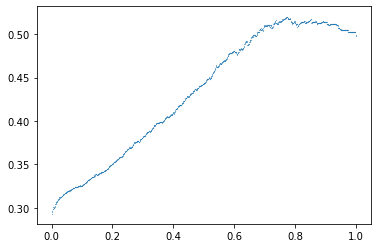

In [5]:
print('------------------------')
print('LSA(S) vs. Judge 1- F1:', max([(x[0], x[1]) for x in listStringentJudge1]))
print('LSA(S) vs. Judge 2- F1:', max([(x[0], x[1]) for x in listStringentJudge2]))


print('------------------------')
print('LSA(I) vs. Judge 1- F1:', max([(x[0], x[1]) for x in listIntermediateJudge1]))
print('LSA(I) vs. Judge 2- F1:', max([(x[0], x[1]) for x in listIntermediateJudge2]))


print('------------------------')
print('LSA(L) vs. Judge 1- F1:', max([(x[0], x[1]) for x in listLenientJudge1]))
print('LSA(L) vs. Judge 2- F1:', max([(x[0], x[1]) for x in listLenientJudge2]))

print('------------------------')


print('------------------------')
print('------------------------')
print('------------------------')
print('------------------------')
print('------------------------')

print('COMBO(REGEX/LSA)(S) vs. Judge 1- F1:', max([(x[0], x[1]) for x in ClistStringentJudge1]))
print('COMBO(REGEX/LSA)(S) vs. Judge 2- F1:', max([(x[0], x[1]) for x in ClistStringentJudge2]))


print('------------------------')
print('COMBO(REGEX/LSA)(I) vs. Judge 1- F1:', max([(x[0], x[1]) for x in ClistIntermediateJudge1]))
print('COMBO(REGEX/LSA)(I) vs. Judge 2- F1:', max([(x[0], x[1]) for x in ClistIntermediateJudge2]))


print('------------------------')
print('COMBO(REGEX/LSA)(L) vs. Judge 1- F1:', max([(x[0], x[1]) for x in ClistLenientJudge1]))
print('COMBO(REGEX/LSA)(L) vs. Judge 2- F1:', max([(x[0], x[1]) for x in ClistLenientJudge2]))

print('------------------------')



import numpy as np
import matplotlib.pyplot as plt


x = [x[1] for x in ClistStringentJudge1]
y = [x[0] for x in ClistStringentJudge1]


print('Judge 1 vs. COMBO(S):')
plt.scatter(x, y, marker="D",s=.01)

Judge 2 vs. LSA(S):


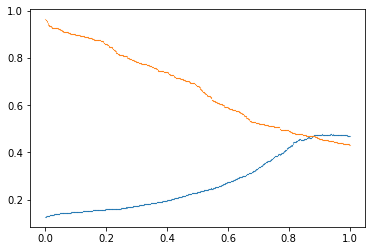

In [58]:

x = [x[1] for x in ClistStringentJudge2R]
y = [x[0] for x in ClistStringentJudge2R]

x1 = [x[1] for x in ClistStringentJudge2P]
y1 = [x[0] for x in ClistStringentJudge2P]


print('Judge 2 vs. LSA(S):')
plt.scatter(x, y, marker="D",s=.01)
plt.scatter(x1, y1, marker="D",s=.01)


Judge 1 vs. LSA(I):


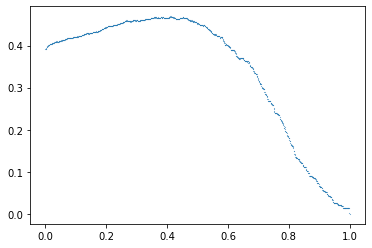

In [56]:
x = [x[1] for x in listIntermediateJudge1]
y = [x[0] for x in listIntermediateJudge1]


print('Judge 1 vs. LSA(I):')
plt.scatter(x, y, marker="D",s=.01)

In [ ]:
x = [x[1] for x in listIntermediateJudge2]
y = [x[0] for x in listIntermediateJudge2]


print('Judge 2 vs. LSA(I):')
plt.scatter(x, y, marker="D",s=.01)

Judge 1 vs. LSA(L):


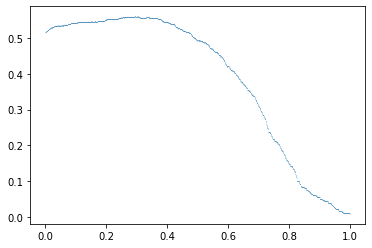

In [112]:
x = [x[1] for x in listLenientJudge1]
y = [x[0] for x in listLenientJudge1]


print('Judge 1 vs. LSA(L):')
plt.scatter(x, y, marker="D",s=.001)
plt.show()

In [ ]:
x = [x[1] for x in listLenientJudge2]
y = [x[0] for x in listLenientJudge2]


print('Judge 2 vs. LSA(L):')
plt.scatter(x, y, marker="D",s=.01)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys

x = [x[1] for x in listStringentJudge1]
y = [x[0] for x in listStringentJudge1]


print('Judge 1 vs. LSA(S):')
plt.scatter(x, y, s=.01)
plt.show()

In [ ]:
print(listStringentJudge1[0])

NameError: name 'sys' is not defined

In [ ]:
x = [x[1] for x in listLenientJudge1]
y = [x[0] for x in listLenientJudge1]


print('Judge 1 vs. LSA(L):')
plt.scatter(x, y,s=.01)
plt.show()

NameError: name 'pd' is not defined

In [9]:
print(JudgesS)

[0]


In [35]:
Jthreshv = 6
J2threshv = 6
LSAthreshv = .506   #Stringent(S) thresholds .58

JthreshIv = 5
J2threshIv = 5
LSAthreshIv = .4  #Intermediate(I) thresholds .509 = .443f1 or .515

JthreshLv = 4
J2threshLv = 4
LSAthreshLv = .27 #Lenient(L) thresholds(.369 and .42,.427,,428=.538) (.366=.357) .29 and .355 is .536 (.35,.535)

JudgesS = ()
Jthresh = []                        ##the next 8 for loops are about coding match values for human judges and computer models(LSA,w2v,w2vB,D2V)
for value in ET.J1: 
    if value == Jthreshv: 
        Jthresh.append(1)  
    else: 
        Jthresh.append(0) 
J2thresh = [] 
for value in ET.J2: 
    if value == J2threshv: 
        J2thresh.append(1)  
    else: 
        J2thresh.append(0)    
LSAthresh = [] 
for value in df['LSAp']: 
    if value >= LSAthreshv: 
        LSAthresh.append(1)
    else: 
        LSAthresh.append(0)

def merge(Jthresh, J2thresh): 
      
    merged_list = [(Jthresh[i], J2thresh[i]) for i in range(0, len(Jthresh))] 
    return merged_list 
      
# Driver 
JudgesS = merge(Jthresh, J2thresh)           ##Very important. Used for Judges either/or as well as LSA/RegEx combination thresholds.
JBthresh = []
for value in JudgesS:
    if value[0] or value[1] == 1:
        JBthresh.append(1)
    else:
        JBthresh.append(0)


[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 

In [26]:
JudgesS = []
i = 0
while i <= len(Jthresh): 
    i += 1
    for value in [(Jthresh, J2thresh)]:
        if value >= .5:
            JudgesS.join(1)
        else:
            JudgesS.join(0)
            
    

TypeError: '>=' not supported between instances of 'tuple' and 'float'

In [40]:
print('LSA(S) vs. Judge 2:', max([(x[0], x[1]) for x in listStringentJudge2]))

LSA(S) vs. Judge 2: (0.29456668163448585, 0.47500000000000037)


In [66]:
print( listLenientJudge2)

[(0.5753679318357862, 0.001), (0.5754276827371695, 0.002), (0.5746910683560144, 0.003), (0.575962293794187, 0.004), (0.5767955801104973, 0.005), (0.579047619047619, 0.006), (0.579585326953748, 0.007), (0.581223966677347, 0.008), (0.5816835667149525, 0.009000000000000001), (0.5820413436692506, 0.010000000000000002), (0.5824834061842318, 0.011000000000000003), (0.5832115603182335, 0.012000000000000004), (0.5831435079726651, 0.013000000000000005), (0.5842036553524804, 0.014000000000000005), (0.5844092171923517, 0.015000000000000006), (0.5851098720892096, 0.016000000000000007), (0.5853899308983218, 0.017000000000000008), (0.5856553998351195, 0.01800000000000001), (0.585962014863749, 0.01900000000000001), (0.5866004962779157, 0.02000000000000001), (0.5868124585818423, 0.02100000000000001), (0.5872778608204617, 0.022000000000000013), (0.5877265923831698, 0.023000000000000013), (0.5869021829695051, 0.024000000000000014), (0.5870364183093886, 0.025000000000000015), (0.5875062803550494, 0.02600

In [44]:
print(max([listStringentJudge1][0])[0])

0.358148893360161
